## Importing modules

In [161]:
import pandas as pd
# import gseapy as gp
import matplotlib.pyplot as plt
# from gseapy.parser import Biomart
import os
import numpy as np
import seaborn as sns
# from gseapy.plot import gseaplot
from scipy import stats as st
import fnmatch
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [162]:
# !mkdir /data/nandas/Combined_coexp/Part_1_TranscriptionallyRegulatedGenes/Development/

## Setting base directory

In [163]:
Base_dir='/data/nandas/Combined_coexp/Part_1_TranscriptionallyRegulatedGenes/Development/'
os.chdir(Base_dir)

In [164]:
mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',index_col=0)

In [198]:
HighMod=pd.read_csv("/data/nandas/Transcription/KimDevTime_071620/HighModExpdata.csv",index_col=0)

In [199]:
HighMod

,DH2_N2_0,DH2_N2_2,DH2_N2_4,DH2_N2_6,DH2_N2_8,DH2_N2_10,DH2_N2_12,DH2_N2_14,DH2_N2_16,DH2_N2_18,...,DH2_N2_32,DH2_N2_34,DH2_N2_36,DH2_N2_38,DH5_N2_38,DH5_N2_40,DH5_N2_42,DH5_N2_44,DH5_N2_46,DH5_N2_48
WormBaseID,,,,,,,,,,,,,,,,,,,,,
WBGene00007227,6.141919,6.079144,6.108109,6.092717,6.018767,5.992436,5.991411,5.920965,6.161925,6.098863,...,5.224523,5.379006,5.527182,5.475483,5.553977,5.716296,5.531312,5.288699,5.130478,5.164031
WBGene00019836,3.563390,4.952570,4.750046,4.419945,4.578392,4.229339,3.884911,4.328743,4.347962,4.721181,...,4.728536,4.621224,4.621638,4.813743,4.861667,4.766812,4.700820,4.547876,4.693232,4.669324
WBGene00000292,6.718799,6.978957,6.831312,6.636145,6.592356,6.531118,6.560096,6.573058,6.617558,6.536093,...,6.560376,6.500929,6.418218,6.447307,6.502472,6.465293,6.464417,6.440660,6.451583,6.372708
WBGene00006467,4.289018,4.369471,3.962033,3.881415,3.713469,3.519108,3.543772,3.475918,3.592274,4.265834,...,3.173738,2.952612,3.296612,3.682746,4.083763,3.965087,3.838017,3.252285,2.880020,2.781618
WBGene00017226,1.999977,2.145297,2.405354,1.799817,0.862020,0.551495,0.056915,-0.430264,-0.315235,0.035140,...,-0.744154,-1.399764,-1.912343,-0.319813,-0.617339,-0.543645,-0.335010,-0.387765,-0.529150,-0.880802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBGene00001054,3.353902,3.504389,3.223766,3.494252,3.509859,3.663353,3.458189,3.816570,4.224393,4.021201,...,2.862553,3.356456,3.608313,3.323618,3.673217,3.654360,2.809360,2.727707,2.805127,3.681514
WBGene00008216,1.636292,2.849661,2.689332,2.210126,1.299980,2.396082,3.420828,2.775656,2.592899,1.102501,...,1.637630,1.643714,1.437792,0.816910,0.855482,1.184979,1.665193,2.208812,1.732015,1.151735
WBGene00010769,7.118605,6.955705,6.853999,7.513069,6.246512,6.588372,6.531192,7.384917,5.733282,5.424624,...,4.583269,4.656193,4.548290,5.065179,4.880986,4.837443,5.221351,5.770519,5.762361,5.336761


## Functions

In [200]:
def wb_to_gene(matrix):
    mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',index_col=1)
    mapper_df=mapper_df.loc[mapper_df.index.dropna()]
    wb_to_gene = {};
    for wb in mapper_df.index:
        wb_to_gene[wb] = str(mapper_df.loc[wb]['GeneName']);
    matrix=matrix.rename(index=wb_to_gene,columns=wb_to_gene)
    return matrix

def gene_to_wb(matrix):
    mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',index_col=2)
    mapper_df=mapper_df.loc[mapper_df.index.dropna()]
    gene_to_wb = {};
    for gene in mapper_df.index:
        gene_to_wb[gene] = str(mapper_df.loc[gene]['WormBaseID']);
    matrix=matrix.rename(index=gene_to_wb,columns=gene_to_wb)
    return matrix

def SeqToWB(matrix):
    mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',index_col=3)
    mapper_df=mapper_df.loc[mapper_df.index.dropna()]
    Seq_to_Wb = {};
    mapper_df=mapper_df[mapper_df.index!=np.nan]
    for seq in mapper_df.index:
        Seq_to_Wb[seq] = str(mapper_df.loc[seq]['WormBaseID']);
    matrix=matrix.rename(index=Seq_to_Wb,columns=Seq_to_Wb)
    return matrix

def SeqToGene(matrix):
    mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',index_col=3)
    mapper_df=mapper_df.loc[mapper_df.index.dropna()]
    Seq_to_Gene = {};
    mapper_df=mapper_df[mapper_df.index!=np.nan]
    for seq in mapper_df.index:
        Seq_to_Gene[seq] = str(mapper_df.loc[seq]['GeneName']);
    matrix=matrix.rename(index=Seq_to_Gene,columns=Seq_to_Gene)
    return matrix

def CalculateZScore(df):
    from scipy import stats
    Zscore=stats.zscore(df.values,axis=1,nan_policy='omit')
    ZScore_df=pd.DataFrame(Zscore,index=df.index,columns=df.columns)
    return ZScore_df

## Calculate coefficient of variation
def CalculateCoefVar(ZScore_df):
    Std=np.nanstd(ZScore_df.values,axis=1)
    Mean=ZScore_df.mean(axis=1,skipna=True)
    CoefVar=pd.DataFrame([])
#     from scipy.stats import variation 
#     Variation=variation(ZScore_df.values, axis = 1)
    CoefVar['CoefVar']=(Std/Mean)
    CoefVar.index=ZScore_df.index
    return CoefVar

def Log2Transform(df,title):
    #df=df.drop(columns=['GENEID','GENENAME'])
    df=df.stack()
    df=df.loc[~(df==0)]
    df=pd.DataFrame(df)
    df=df.applymap(np.log2)
    ## Plot the values of all cells in the dataframe to understand the distribution
    hist=df.hist(grid=False,bins=100,color='skyblue')
#     plt.axvline(1.3,color='r')
#     plt.axvline(df.mode()[1],color='g')
    plt.xlabel("log2(TPM)")
    plt.ylabel("Frequency")
    plt.title("{}".format(title))
    plt.savefig("{}.svg".format(title))
    return df,hist

def PlotCoefVar(CoefVar,title):
    fig, ax = plt.subplots(figsize=(7,5))
    AllGenes=CoefVar.CoefVar.hist(ax=ax,color='green',bins=100,label='All genes',alpha=0.5)
    MetabolicGenes=CoefVar.loc[intersect2].hist(ax=ax,color='midnightblue',bins=100,label='Metabolic genes',alpha=0.5)  
    ax.grid(False)
    plt.title("Distribution of Coefficient of variation")
    ax.set_xlabel('Coefficient of Variation')
    ax.set_ylabel('Number of genes')
#     for xc in xcoords:
#         ax.axvline(xc,color='blue',linestyle='--')
    plt.legend(loc='best')
    plt.savefig("{}.svg".format(title), dpi=300)


## Reading correlation files

In [201]:
Kim_data=pd.read_csv("/data/nandas/Transcription/KimDevTime_071620/HighModLowExpData.csv", index_col=0)

In [202]:
Kim_data

,DH2_N2_0,DH2_N2_2,DH2_N2_4,DH2_N2_6,DH2_N2_8,DH2_N2_10,DH2_N2_12,DH2_N2_14,DH2_N2_16,DH2_N2_18,...,DH2_N2_32,DH2_N2_34,DH2_N2_36,DH2_N2_38,DH5_N2_38,DH5_N2_40,DH5_N2_42,DH5_N2_44,DH5_N2_46,DH5_N2_48
WormBaseID,,,,,,,,,,,,,,,,,,,,,
WBGene00007730,209.643342,88.363000,72.332466,49.606871,40.034717,43.276926,41.988053,39.521846,40.015432,40.866053,...,34.155401,26.004899,25.627481,28.168593,25.457410,23.305950,25.391301,24.943419,23.943092,24.306766
WBGene00006602,91.279222,24.273105,32.684494,33.082314,26.045059,22.954519,14.684037,11.307665,12.556427,23.065512,...,10.269618,10.281310,9.785582,13.665757,12.855277,13.392052,15.973921,13.487525,8.447591,7.132141
WBGene00019493,5.048938,11.170063,10.695013,12.477660,13.303723,12.624429,12.686918,13.480569,11.197824,12.714521,...,10.383295,12.804304,12.685064,13.425964,16.322119,15.414219,15.096184,14.712803,13.918753,14.021430
WBGene00006945,37.506395,96.569063,87.322692,77.616541,94.112617,64.173803,52.268158,51.589683,43.302898,48.404530,...,58.853565,55.660215,44.532836,50.395714,43.470928,40.364070,47.626044,48.438611,46.042523,47.611984
WBGene00001698,0.165992,0.136808,0.148435,0.491262,0.552361,0.357692,0.564513,0.706799,0.742265,0.533815,...,0.106404,0.291677,0.134941,0.053196,0.227751,0.154875,0.149144,0.112530,0.204860,0.291172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBGene00003741,211.063108,171.380213,124.150533,104.460721,92.814647,88.987936,73.208339,68.485801,67.282190,63.977611,...,38.725326,34.461702,31.369981,27.217018,26.551577,26.739787,27.336740,25.258750,21.218056,21.070213
WBGene00009268,0.156153,NaN,NaN,0.135924,NaN,NaN,0.106210,NaN,NaN,NaN,...,NaN,NaN,NaN,0.125107,NaN,0.072847,0.263068,0.705730,2.452755,2.955369
WBGene00018997,7.939124,13.540226,11.334303,9.059445,9.281224,8.588773,7.498755,7.972408,6.303001,8.402249,...,8.205121,8.050701,7.133252,7.899013,6.911621,6.696507,6.918496,7.016034,6.522380,6.365928


In [203]:
MetabolicGenes=pd.read_csv("/data/nandas/MetabolicClasses_August_SN_090221.csv",index_col=0)

In [204]:
MetabolicGenes

,Sequence Name,Class,Molecular Function,iCEL1273 description / Notes,Wormbase Description Text
Gene Name,,,,,
WBGene00017071,D2096.3,A,Maltase glucoamylase,Galactose metabolism; Starch and sucrose metab...,aagr-1 is an ortholog of human SI (sucrase-iso...
WBGene00019895,R05F9.12,A,Maltase glucoamylase,Galactose metabolism; Starch and sucrose metab...,aagr-2 is an ortholog of human SI (sucrase-iso...
WBGene00009583,F40F9.6,A,Maltase glucoamylase,N-Glycan biosynthesis,aagr-3 is an ortholog of human GANC (glucosida...
WBGene00018682,F52D1.1,A,Maltase glucoamylase,N-Glycan biosynthesis,aagr-4 is an ortholog of human GANC (glucosida...
WBGene00000001,Y110A7A.10,A,phosphoinositide 3-kinase,Inositol phosphate metabolism,aap-1 encodes the C. elegans ortholog of the p...
...,...,...,...,...,...
WBGene00009078,F23B2.13,A,NaN,NaN,NaN
WBGene00000366,R10E11.1,A,NaN,NaN,NaN
WBGene00016603,C43E11.3,A,NaN,NaN,NaN


In [172]:
# def Log2Transform(df):
#     #df=df.drop(columns=['GENEID','GENENAME'])
#     df=df.applymap(np.log2)
#     ## Plot the values of all cells in the dataframe to understand the distribution
#     return df

In [173]:
# Transformed_Kim_data=Log2Transform(Kim_data)

In [174]:
Kim_data.min().min()

0.00111833958393112

In [175]:
# Tissue_exp=gene_to_wb(Tissue_exp)  

## Filtering for only live, protein coding genes

In [205]:
MasterList=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv",index_col=0)
MasterList.set_index(['WormBaseID'],inplace=True)

In [206]:
MasterList=MasterList[MasterList.Type=='protein_coding_gene']
MasterList=MasterList[MasterList.Status=='Live']

In [207]:
MasterList[~MasterList.index.str.contains('WB')]

,GeneName,SequenceID,Status,Type
WormBaseID,,,,


In [208]:
MasterList

,GeneName,SequenceID,Status,Type
WormBaseID,,,,
WBGene00000001,aap-1,Y110A7A.10,Live,protein_coding_gene
WBGene00000002,aat-1,F27C8.1,Live,protein_coding_gene
WBGene00000003,aat-2,F07C3.7,Live,protein_coding_gene
WBGene00000004,aat-3,F52H2.2,Live,protein_coding_gene
WBGene00000005,aat-4,T13A10.10,Live,protein_coding_gene
...,...,...,...,...
WBGene00306070,W02A2.12,W02A2.12,Live,protein_coding_gene
WBGene00306076,Y53C10A.25,Y53C10A.25,Live,protein_coding_gene
WBGene00306080,Y71F9AM.11,Y71F9AM.11,Live,protein_coding_gene


In [209]:
masterlist=list(set(MasterList.index).intersection(set(Kim_data.index)))
x=Kim_data.loc[masterlist]

In [210]:
diff=list(set(Kim_data.index).difference(set(MasterList.index)))


In [211]:
len(masterlist)

18113

In [212]:

x.to_csv("TotalGenesKim.csv")

In [213]:
x

,DH2_N2_0,DH2_N2_2,DH2_N2_4,DH2_N2_6,DH2_N2_8,DH2_N2_10,DH2_N2_12,DH2_N2_14,DH2_N2_16,DH2_N2_18,...,DH2_N2_32,DH2_N2_34,DH2_N2_36,DH2_N2_38,DH5_N2_38,DH5_N2_40,DH5_N2_42,DH5_N2_44,DH5_N2_46,DH5_N2_48
WormBaseID,,,,,,,,,,,,,,,,,,,,,
WBGene00009996,76.094495,54.810886,42.786958,27.823123,22.065126,22.305794,22.135439,18.577381,20.244822,18.328900,...,18.220374,18.104108,18.279095,19.777288,19.205936,19.004418,20.694457,19.924897,20.801241,21.442581
WBGene00011547,0.242026,0.249341,0.206121,0.351121,NaN,NaN,0.054873,NaN,0.100210,NaN,...,NaN,NaN,0.036435,0.129272,0.042574,0.150544,NaN,NaN,NaN,NaN
WBGene00003835,1.551369,2.613369,3.093256,1.934351,1.744046,1.496443,1.468711,1.653092,2.031170,1.741670,...,5.442636,5.046817,5.141225,5.845159,6.549442,6.611388,8.405787,8.397090,9.502578,10.383922
WBGene00020826,1.322341,0.123846,0.460704,0.313919,0.285731,0.161902,0.327059,0.189581,0.149320,0.483240,...,0.064216,0.211234,NaN,NaN,0.126876,0.168242,0.135014,0.407475,3.034659,5.771150
WBGene00006922,9.195512,9.030758,7.684943,9.724818,9.498425,9.953857,9.177144,9.351579,9.073593,10.594264,...,12.440878,10.772046,9.936090,10.328019,11.564623,9.421554,11.196361,12.137558,12.486439,10.036700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBGene00015786,24.662336,12.371859,13.650885,14.203353,15.803831,13.774883,10.660008,8.051559,8.174661,7.772965,...,5.273299,4.728997,5.071205,4.430177,3.472967,3.465824,3.505213,4.082052,3.729946,2.630797
WBGene00019814,1.405504,2.171977,1.635176,0.305857,0.298277,0.135209,0.068284,NaN,0.187052,NaN,...,0.026814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028159,NaN
WBGene00016741,31.852681,38.202283,30.303630,20.210138,19.326540,19.737399,16.118350,14.222615,14.419876,17.869546,...,19.910791,18.151090,18.458691,21.868743,20.201329,20.901976,22.574529,22.981212,23.035538,24.646278


In [214]:
## Filtering for live protein-coding genes
Kim_data=Kim_data.loc[x.index]

##### Tissue_exp=Tissue_exp.loc[x.index]

In [186]:
# Tissue_cat=SeqToGene(Tissue_cat)
# Tissue_exp=SeqToGene(Tissue_exp)
# Tissue_data=SeqToGene(Tissue_data)

In [187]:
# Tissue_cat=gene_to_wb(Tissue_cat)

## Finding genes that show either high or moderate expression in at least one tissue

In [215]:
HighMod= Kim_data.loc[HighMod.index]

In [189]:
# HighMod=Kim_data.loc[HighMod]
# HighMod=[x for x in HighMod if str(x) != 'nan']

In [216]:
HighMod

,DH2_N2_0,DH2_N2_2,DH2_N2_4,DH2_N2_6,DH2_N2_8,DH2_N2_10,DH2_N2_12,DH2_N2_14,DH2_N2_16,DH2_N2_18,...,DH2_N2_32,DH2_N2_34,DH2_N2_36,DH2_N2_38,DH5_N2_38,DH5_N2_40,DH5_N2_42,DH5_N2_44,DH5_N2_46,DH5_N2_48
WormBaseID,,,,,,,,,,,,,,,,,,,,,
WBGene00007227,70.615819,67.609032,68.980156,68.248106,64.837985,63.665339,63.620106,60.588191,71.601861,68.539441,...,37.388512,41.614255,46.115568,44.492279,46.980068,52.574661,46.247786,39.089218,35.029003,35.853226
WBGene00019836,11.821903,30.965080,26.909551,21.406030,23.890943,18.756760,14.773205,20.094695,20.364188,26.376493,...,26.511306,24.610876,24.617939,28.124247,29.074190,27.224087,26.006861,23.390912,25.870434,25.445235
WBGene00000292,105.331902,126.146530,113.875400,99.466931,96.493245,92.483081,94.359485,95.211110,98.193687,92.802552,...,94.377819,90.567975,85.521647,87.263552,90.664864,88.358284,88.304613,86.862403,87.522572,82.865958
WBGene00006467,19.548932,20.670068,15.584429,14.737452,13.117938,11.464553,11.662235,11.126424,12.060973,19.237292,...,9.023820,7.741497,9.826050,12.841537,16.956458,15.617446,14.300727,9.528738,7.361606,6.876232
WBGene00017226,3.999935,4.423834,5.297654,3.481761,1.817581,1.465604,1.040239,0.742126,0.803720,1.024656,...,0.597018,0.378991,0.265661,0.801174,0.651872,0.686036,0.792779,0.764313,0.692963,0.543066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBGene00001054,10.224099,11.348181,9.342223,11.268721,11.391288,12.670076,10.990533,14.089706,18.692573,16.236861,...,7.273015,10.242219,12.195801,10.011724,12.756997,12.591340,7.009737,6.624018,6.989199,12.830576
WBGene00008216,3.108658,7.208310,6.450149,4.627157,2.462255,5.263717,10.709566,6.847871,6.033098,2.147266,...,3.111543,3.124692,2.709059,1.761628,1.809364,2.273601,3.171561,4.622945,3.321915,2.221810
WBGene00010769,138.967582,124.129728,115.680265,182.666597,75.925469,96.227153,92.487840,167.140446,53.197335,42.951126,...,23.971839,25.214695,23.397616,33.478864,29.466143,28.590079,37.306387,54.588269,54.280469,40.413380


In [191]:
# HighMod=Kim_data.loc[HighMod]

In [217]:
HighMod=HighMod[~HighMod.index.duplicated(keep='first')]

In [218]:
leg=list(set(x.index).difference(set(HighMod.index)))
LowExpGenes=Kim_data.loc[leg]

In [219]:
LowExpGenes.to_csv("LowExpGenes_Kim.csv")

In [278]:
LowExpGenes['Class']=MetabolicClasses['Class']

In [286]:
LowExpClass=LowExpGenes.Class.dropna()

In [288]:
LowExpClass=pd.DataFrame(LowExpClass)

In [291]:
LowExpClass[LowExpClass.Class!='A'].shape

(156, 1)

In [35]:
# LowExpGenes

In [36]:
# HighMod=SeqToGene(HighMod)

In [221]:
HighMod=HighMod[~HighMod.index.duplicated(keep='first')]

In [222]:
HighMod.to_csv("Development_HighMod.csv")

In [223]:
HighMod.index=HighMod.index.str.strip()

In [224]:
MetabolicClasses=pd.read_csv("/data/nandas/MetabolicClasses_August_SN_090221.csv",index_col=0)

In [225]:
MetabolicClasses=MetabolicClasses[~MetabolicClasses.index.duplicated(keep='first')]

In [226]:
HighMod

,DH2_N2_0,DH2_N2_2,DH2_N2_4,DH2_N2_6,DH2_N2_8,DH2_N2_10,DH2_N2_12,DH2_N2_14,DH2_N2_16,DH2_N2_18,...,DH2_N2_32,DH2_N2_34,DH2_N2_36,DH2_N2_38,DH5_N2_38,DH5_N2_40,DH5_N2_42,DH5_N2_44,DH5_N2_46,DH5_N2_48
WormBaseID,,,,,,,,,,,,,,,,,,,,,
WBGene00007227,70.615819,67.609032,68.980156,68.248106,64.837985,63.665339,63.620106,60.588191,71.601861,68.539441,...,37.388512,41.614255,46.115568,44.492279,46.980068,52.574661,46.247786,39.089218,35.029003,35.853226
WBGene00019836,11.821903,30.965080,26.909551,21.406030,23.890943,18.756760,14.773205,20.094695,20.364188,26.376493,...,26.511306,24.610876,24.617939,28.124247,29.074190,27.224087,26.006861,23.390912,25.870434,25.445235
WBGene00000292,105.331902,126.146530,113.875400,99.466931,96.493245,92.483081,94.359485,95.211110,98.193687,92.802552,...,94.377819,90.567975,85.521647,87.263552,90.664864,88.358284,88.304613,86.862403,87.522572,82.865958
WBGene00006467,19.548932,20.670068,15.584429,14.737452,13.117938,11.464553,11.662235,11.126424,12.060973,19.237292,...,9.023820,7.741497,9.826050,12.841537,16.956458,15.617446,14.300727,9.528738,7.361606,6.876232
WBGene00017226,3.999935,4.423834,5.297654,3.481761,1.817581,1.465604,1.040239,0.742126,0.803720,1.024656,...,0.597018,0.378991,0.265661,0.801174,0.651872,0.686036,0.792779,0.764313,0.692963,0.543066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBGene00001054,10.224099,11.348181,9.342223,11.268721,11.391288,12.670076,10.990533,14.089706,18.692573,16.236861,...,7.273015,10.242219,12.195801,10.011724,12.756997,12.591340,7.009737,6.624018,6.989199,12.830576
WBGene00008216,3.108658,7.208310,6.450149,4.627157,2.462255,5.263717,10.709566,6.847871,6.033098,2.147266,...,3.111543,3.124692,2.709059,1.761628,1.809364,2.273601,3.171561,4.622945,3.321915,2.221810
WBGene00010769,138.967582,124.129728,115.680265,182.666597,75.925469,96.227153,92.487840,167.140446,53.197335,42.951126,...,23.971839,25.214695,23.397616,33.478864,29.466143,28.590079,37.306387,54.588269,54.280469,40.413380


In [43]:
# MetabolicClasses=gene_to_wb(MetabolicClasses)

In [44]:
# MetabolicClasses.to_csv("/data/nandas/MetabolicClasses_August_SN_090221.csv")

In [45]:
# MetabolicClasses['WormBaseID']='WORMBASE'

In [46]:
# MetabolicClasses=gene_to_wb(MetabolicClasses)

In [47]:
# MetabolicClasses.reset_index(inplace=True)
# MetabolicClasses.set_index(['Sequence Name'],inplace=True)

In [48]:
# MetabolicClasses=SeqToWB(MetabolicClasses)

In [49]:
# MetabolicClasses.reset_index(inplace=True)

In [50]:
# MetabolicClasses

In [51]:
# # MetabolicClasses.reset_index(inplace=True)
# # df.reset_index(inplace=True)
# for i in range(MetabolicClasses.shape[0]):
#     if "WB" in str(MetabolicClasses.iloc[i]['Gene Name']):
#          if "\n" not in str(MetabolicClasses.iloc[i]['Gene Name']):
#             print ("Checking in index: {}:{}".format(i,MetabolicClasses.iloc[i]['Gene Name']))
#             MetabolicClasses.at[i,'WormBaseID']=MetabolicClasses.iloc[i]['Gene Name']
#     if "WB" in str(MetabolicClasses.iloc[i]['Sequence Name']):
#         if "\n" not in str(MetabolicClasses.iloc[i]['Sequence Name']):
#             print ("Checking in Sequence name: {}:{}".format(i,MetabolicClasses.iloc[i]['Sequence Name']))
#             MetabolicClasses.at[i,'WormBaseID']=MetabolicClasses.iloc[i]['Sequence Name']

In [52]:
# MetabolicClasses.set_index(['WormBaseID'],inplace=True)

In [53]:
# MetabolicClasses.drop(columns=['Sequence Name','Gene Name'],inplace=True)

In [227]:
MetabolicClasses.loc[['WBGene00000481']]

,Sequence Name,Class,Molecular Function,iCEL1273 description / Notes,Wormbase Description Text
Gene Name,,,,,
WBGene00000481,ZC416.8,A,Choline acetyltransferase,Glycerophospholipid metabolism,"cha-1 is part of a gene complex, in which it s..."


In [55]:
MetabolicClasses=MetabolicClasses[~MetabolicClasses.index.duplicated(keep='first')]

In [56]:
# Tissue_exp.index=Tissue_exp.index.str.strip()

In [57]:
# x[x.index.str.contains('WB')]

,DH2_N2_0,DH2_N2_2,DH2_N2_4,DH2_N2_6,DH2_N2_8,DH2_N2_10,DH2_N2_12,DH2_N2_14,DH2_N2_16,DH2_N2_18,...,DH2_N2_32,DH2_N2_34,DH2_N2_36,DH2_N2_38,DH5_N2_38,DH5_N2_40,DH5_N2_42,DH5_N2_44,DH5_N2_46,DH5_N2_48
WormBaseID,,,,,,,,,,,,,,,,,,,,,
WBGene00009996,76.094495,54.810886,42.786958,27.823123,22.065126,22.305794,22.135439,18.577381,20.244822,18.328900,...,18.220374,18.104108,18.279095,19.777288,19.205936,19.004418,20.694457,19.924897,20.801241,21.442581
WBGene00011547,0.242026,0.249341,0.206121,0.351121,NaN,NaN,0.054873,NaN,0.100210,NaN,...,NaN,NaN,0.036435,0.129272,0.042574,0.150544,NaN,NaN,NaN,NaN
WBGene00003835,1.551369,2.613369,3.093256,1.934351,1.744046,1.496443,1.468711,1.653092,2.031170,1.741670,...,5.442636,5.046817,5.141225,5.845159,6.549442,6.611388,8.405787,8.397090,9.502578,10.383922
WBGene00020826,1.322341,0.123846,0.460704,0.313919,0.285731,0.161902,0.327059,0.189581,0.149320,0.483240,...,0.064216,0.211234,NaN,NaN,0.126876,0.168242,0.135014,0.407475,3.034659,5.771150
WBGene00006922,9.195512,9.030758,7.684943,9.724818,9.498425,9.953857,9.177144,9.351579,9.073593,10.594264,...,12.440878,10.772046,9.936090,10.328019,11.564623,9.421554,11.196361,12.137558,12.486439,10.036700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBGene00015786,24.662336,12.371859,13.650885,14.203353,15.803831,13.774883,10.660008,8.051559,8.174661,7.772965,...,5.273299,4.728997,5.071205,4.430177,3.472967,3.465824,3.505213,4.082052,3.729946,2.630797
WBGene00019814,1.405504,2.171977,1.635176,0.305857,0.298277,0.135209,0.068284,NaN,0.187052,NaN,...,0.026814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028159,NaN
WBGene00016741,31.852681,38.202283,30.303630,20.210138,19.326540,19.737399,16.118350,14.222615,14.419876,17.869546,...,19.910791,18.151090,18.458691,21.868743,20.201329,20.901976,22.574529,22.981212,23.035538,24.646278


In [228]:
MetabolicClasses.index=MetabolicClasses.index.str.strip()

In [229]:
MetabolicClasses[~MetabolicClasses.index.str.contains('WB')]

,Sequence Name,Class,Molecular Function,iCEL1273 description / Notes,Wormbase Description Text
Gene Name,,,,,
F26A1.14,F26A1.14,B,"2',3'-cyclic nucleotide 3' phosphodiesterase",NaN,F26A1.14 is an ortholog of human N4BP2L1 (NEDD...


In [230]:
diff=list(set(MetabolicClasses.index).difference(set(Kim_data.index)))

In [61]:
# HighMod=wb_to_gene(HighMod)
# HighMod=SeqToGene(HighMod)

In [231]:
len(diff)


110

## Extracting metabolic genes

In [232]:
intersect=list(set(x.index).intersection(set(MetabolicClasses.index)))

In [233]:
len(intersect)

2397

In [65]:
# MetabolicDevHighModLow=Tissue_exp.loc[intersect]

In [66]:
# MetabolicTissueHighModLow=MetabolicTissueHighModLow[~MetabolicTissueHighModLow.index.duplicated(keep='first')]

In [67]:
# MetabolicTissueHighModLow.to_csv("/data/nandas/Combined_coexp/Part_1_TranscriptionallyRegulatedGenes/Tissue/MetabolicHighModLow.csv")

In [68]:
# MetabolicTissueHighModLow=pd.read_csv("/data/nandas/Combined_coexp/Part_1_TranscriptionallyRegulatedGenes/Tissue/MetabolicHighModLow.csv",
#                                       index_col=0)

In [69]:
# CoefVar_HighModLow=CalculateCoefVar(MetabolicTissueHighModLow)

In [70]:
# CoefVar_HighModLow.to_csv("CoefVarHighModLow.csv")

In [71]:
# MetabolicTissueHighModLow.to_csv("/data/nandas/Resolve_OR_genes/CaoTissue/MetabolicTissueExp.csv")

In [72]:
# MetabolicTissueHighModLow.to_csv("/data/nandas/Combined_coexp/Part_1_TranscriptionallyRegulatedGenes/Tissue/MetabolicHighModLow.csv")

In [234]:
intersect2=list(set(MetabolicClasses.index).intersection(set(HighMod.index)))

In [235]:
len(intersect2)

2184

In [236]:
MetabolicHighMod=HighMod.loc[intersect2]

In [237]:
MetabolicHighMod.to_csv("MetabolicHighModDevt.csv")

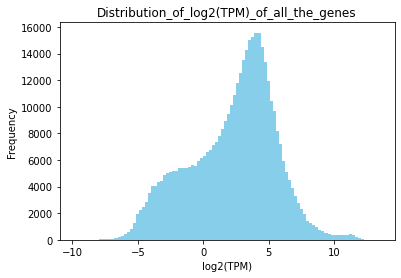

In [238]:
LogTransformed,hist=Log2Transform(Kim_data,
                                  title="Distribution_of_log2(TPM)_of_all_the_genes")

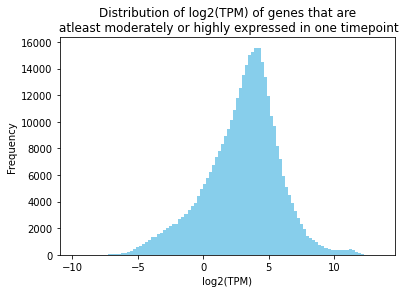

In [239]:
LogTransformed_HighMod,hist_HighMod=Log2Transform(HighMod,"Distribution of log2(TPM) of genes that are\n atleast moderately or highly expressed in one timepoint")

In [79]:
# HighMod.min().min()

## Calculate CV

In [297]:
HighMod

,DH2_N2_0,DH2_N2_2,DH2_N2_4,DH2_N2_6,DH2_N2_8,DH2_N2_10,DH2_N2_12,DH2_N2_14,DH2_N2_16,DH2_N2_18,...,DH2_N2_32,DH2_N2_34,DH2_N2_36,DH2_N2_38,DH5_N2_38,DH5_N2_40,DH5_N2_42,DH5_N2_44,DH5_N2_46,DH5_N2_48
WormBaseID,,,,,,,,,,,,,,,,,,,,,
WBGene00007227,70.615819,67.609032,68.980156,68.248106,64.837985,63.665339,63.620106,60.588191,71.601861,68.539441,...,37.388512,41.614255,46.115568,44.492279,46.980068,52.574661,46.247786,39.089218,35.029003,35.853226
WBGene00019836,11.821903,30.965080,26.909551,21.406030,23.890943,18.756760,14.773205,20.094695,20.364188,26.376493,...,26.511306,24.610876,24.617939,28.124247,29.074190,27.224087,26.006861,23.390912,25.870434,25.445235
WBGene00000292,105.331902,126.146530,113.875400,99.466931,96.493245,92.483081,94.359485,95.211110,98.193687,92.802552,...,94.377819,90.567975,85.521647,87.263552,90.664864,88.358284,88.304613,86.862403,87.522572,82.865958
WBGene00006467,19.548932,20.670068,15.584429,14.737452,13.117938,11.464553,11.662235,11.126424,12.060973,19.237292,...,9.023820,7.741497,9.826050,12.841537,16.956458,15.617446,14.300727,9.528738,7.361606,6.876232
WBGene00017226,3.999935,4.423834,5.297654,3.481761,1.817581,1.465604,1.040239,0.742126,0.803720,1.024656,...,0.597018,0.378991,0.265661,0.801174,0.651872,0.686036,0.792779,0.764313,0.692963,0.543066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBGene00001054,10.224099,11.348181,9.342223,11.268721,11.391288,12.670076,10.990533,14.089706,18.692573,16.236861,...,7.273015,10.242219,12.195801,10.011724,12.756997,12.591340,7.009737,6.624018,6.989199,12.830576
WBGene00008216,3.108658,7.208310,6.450149,4.627157,2.462255,5.263717,10.709566,6.847871,6.033098,2.147266,...,3.111543,3.124692,2.709059,1.761628,1.809364,2.273601,3.171561,4.622945,3.321915,2.221810
WBGene00010769,138.967582,124.129728,115.680265,182.666597,75.925469,96.227153,92.487840,167.140446,53.197335,42.951126,...,23.971839,25.214695,23.397616,33.478864,29.466143,28.590079,37.306387,54.588269,54.280469,40.413380


In [240]:
CoefVar_HighMod=CalculateCoefVar(HighMod)

In [241]:
CoefVar_HighMod['Class']=MetabolicClasses['Class']

In [242]:
CoefVar_HighMod.CoefVar.sort_values(ascending=False)

WormBaseID
WBGene00020700    4.726389
WBGene00000713    4.543391
WBGene00000663    4.494757
WBGene00000754    4.494656
WBGene00000712    4.478181
                    ...   
WBGene00001168    0.063725
WBGene00000200    0.061089
WBGene00004704    0.060805
WBGene00000369    0.058860
WBGene00004806    0.054664
Name: CoefVar, Length: 14561, dtype: float64

In [83]:
# LowExpGenesBin=LowExpGenes[['Neurons']]

In [84]:
# LowExpGenesBin['Tissue bin']='Lowly expressed'

In [85]:
# LowExpGenesBin.drop(columns=['Neurons'],inplace=True)

In [86]:
# LowExpGenesBin['Class']=MetabolicClasses['Class']

In [87]:
# LowExpGenesBin

In [243]:
CoefVar_HighMod_Bin=CoefVar_HighMod

In [244]:
# Bin=(CoefVar_HighMod_Bin['Bin'])

KeyError: 'Bin'

In [145]:
# Bin=pd.DataFrame(Bin)

In [151]:
# Bin.sort_values(by='Bin').dropna(inplace=True)

In [156]:
# Bin.dropna(inplace=True)

In [159]:
# np.unique(Bin.Bin)

array(['Highly variant', 'Invariant', 'Moderately variant'], dtype=object)

In [245]:
GeneSets=pd.read_excel("/data/nandas/Combined_coexp/Pathway_enrichment/NewSets_090420/Gene2Pathways_090320.xlsx",
                       header='infer',index_col=0)

In [246]:
CoefVar_HighMod_Bin['LEVEL 1']=GeneSets['LEVEL 1']
CoefVar_HighMod_Bin['LEVEL 2']=GeneSets['LEVEL 2']
CoefVar_HighMod_Bin['LEVEL 3']=GeneSets['LEVEL 3']
CoefVar_HighMod_Bin['LEVEL 4']=GeneSets['LEVEL 4']

In [247]:
count=0
CoefVar_HighMod_Bin.Bin=np.NaN
for r in CoefVar_HighMod_Bin.index:
    print(count)
    count=count+1
    x = CoefVar_HighMod_Bin.loc[r]['CoefVar']
    if x < 0.3:
        CoefVar_HighMod_Bin.loc[r,'Bin'] = 'Invariant'
    elif x >= 0.75:
        CoefVar_HighMod_Bin.loc[r,'Bin'] = 'Highly variant'
    elif (x>=0.3) and (x<0.75):
        CoefVar_HighMod_Bin.loc[r,'Bin'] = 'Moderately variant'

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077


3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787


5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569


7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274


8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973


10666
10667
10668
10669
10670
10671
10672
10673
10674
10675
10676
10677
10678
10679
10680
10681
10682
10683
10684
10685
10686
10687
10688
10689
10690
10691
10692
10693
10694
10695
10696
10697
10698
10699
10700
10701
10702
10703
10704
10705
10706
10707
10708
10709
10710
10711
10712
10713
10714
10715
10716
10717
10718
10719
10720
10721
10722
10723
10724
10725
10726
10727
10728
10729
10730
10731
10732
10733
10734
10735
10736
10737
10738
10739
10740
10741
10742
10743
10744
10745
10746
10747
10748
10749
10750
10751
10752
10753
10754
10755
10756
10757
10758
10759
10760
10761
10762
10763
10764
10765
10766
10767
10768
10769
10770
10771
10772
10773
10774
10775
10776
10777
10778
10779
10780
10781
10782
10783
10784
10785
10786
10787
10788
10789
10790
10791
10792
10793
10794
10795
10796
10797
10798
10799
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10812
10813
10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
1083

12057
12058
12059
12060
12061
12062
12063
12064
12065
12066
12067
12068
12069
12070
12071
12072
12073
12074
12075
12076
12077
12078
12079
12080
12081
12082
12083
12084
12085
12086
12087
12088
12089
12090
12091
12092
12093
12094
12095
12096
12097
12098
12099
12100
12101
12102
12103
12104
12105
12106
12107
12108
12109
12110
12111
12112
12113
12114
12115
12116
12117
12118
12119
12120
12121
12122
12123
12124
12125
12126
12127
12128
12129
12130
12131
12132
12133
12134
12135
12136
12137
12138
12139
12140
12141
12142
12143
12144
12145
12146
12147
12148
12149
12150
12151
12152
12153
12154
12155
12156
12157
12158
12159
12160
12161
12162
12163
12164
12165
12166
12167
12168
12169
12170
12171
12172
12173
12174
12175
12176
12177
12178
12179
12180
12181
12182
12183
12184
12185
12186
12187
12188
12189
12190
12191
12192
12193
12194
12195
12196
12197
12198
12199
12200
12201
12202
12203
12204
12205
12206
12207
12208
12209
12210
12211
12212
12213
12214
12215
12216
12217
12218
12219
12220
12221
12222
1222

13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13613
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13654
13655
13656
13657
13658
13659
13660
13661
13662
13663
13664
13665
13666
13667
13668
1366

In [248]:
CoefVar_HighMod_Bin.Class.replace('A','iCEL1314 gene',inplace=True)
CoefVar_HighMod_Bin.Class.replace('B','Other metabolic gene',inplace=True)
CoefVar_HighMod_Bin.Class.replace('C','Other metabolic gene',inplace=True)
CoefVar_HighMod_Bin.Class.replace('D','Other metabolic gene',inplace=True)

In [249]:
Highlyvariant=CoefVar_HighMod_Bin[CoefVar_HighMod_Bin.CoefVar>=0.75]

In [250]:
metabolichighlyvariant=list(set(Highlyvariant.index).intersection(set(MetabolicClasses.index)))
MetabolicHighlyVariant=Highlyvariant.loc[metabolichighlyvariant]

In [251]:
nonmetabolichighlyvariant=list(set(Highlyvariant.index).difference(set(MetabolicClasses.index)))
NonMetabolicHighlyVariant=Highlyvariant.loc[nonmetabolichighlyvariant]

In [252]:
Moderatelyvariant=CoefVar_HighMod_Bin[CoefVar_HighMod_Bin.CoefVar<0.75]
Moderatelyvariant=Moderatelyvariant[Moderatelyvariant.CoefVar>=0.3]

In [253]:
metabolicmoderatelyvariant=list(set(Moderatelyvariant.index).intersection(set(MetabolicClasses.index)))
MetabolicModeratelyVariant=Moderatelyvariant.loc[metabolicmoderatelyvariant]

In [254]:
nonmetabolicmoderatelyvariant=list(set(Moderatelyvariant.index).difference(set(MetabolicClasses.index)))
NonMetabolicModeratelyVariant=Moderatelyvariant.loc[nonmetabolicmoderatelyvariant]

In [255]:
Invariant=CoefVar_HighMod_Bin[CoefVar_HighMod_Bin.CoefVar<0.3]

In [256]:
nonmetabolicinvariant=list(set(Invariant.index).difference(set(MetabolicClasses.index)))
NonMetabolicInVariant=Invariant.loc[nonmetabolicinvariant]

In [257]:
metabolicinvariant=list(set(Invariant.index).intersection(set(MetabolicClasses.index)))
MetabolicInVariant=Invariant.loc[metabolicinvariant]

In [258]:
MetabolicInVariant

,CoefVar,Class,LEVEL 1,LEVEL 2,LEVEL 3,LEVEL 4,Bin
WormBaseID,,,,,,,
WBGene00021766,0.151880,iCEL1314 gene,CARBOHYDRATE;LIPIDS,AMINO SUGAR AND NUCLEOTIDE SUGAR METABOLISM;SP...,AMINO SUGAR AND NUCLEOTIDE SUGAR METABOLISM;N-...,AMINO SUGAR AND NUCLEOTIDE SUGAR METABOLISM;N-...,Invariant
WBGene00011224,0.188358,iCEL1314 gene,COFACTORS AND VITAMINS,RIBOFLAVIN METABOLISM,RIBOFLAVIN METABOLISM,RIBOFLAVIN METABOLISM,Invariant
WBGene00012911,0.262054,iCEL1314 gene,LIPIDS,GLYCEROPHOSPHOLIPID METABOLISM,GLYCEROPHOSPHOLIPID METABOLISM,GLYCEROPHOSPHOLIPID METABOLISM,Invariant
WBGene00007422,0.212221,iCEL1314 gene,CARBOHYDRATE;COFACTORS AND VITAMINS;OTHER,PENTOSE AND GLUCURONATE INTERCONVERSIONS;PORPH...,PENTOSE AND GLUCURONATE INTERCONVERSIONS;PORPH...,PENTOSE AND GLUCURONATE INTERCONVERSIONS;PORPH...,Invariant
WBGene00015064,0.164622,iCEL1314 gene,AMINO ACID,CYS AND MET METABOLISM,MET,METHIONINE SALVAGE,Invariant
...,...,...,...,...,...,...,...
WBGene00000207,0.166072,iCEL1314 gene,ENERGY,ETC,OXPHOS-COMPLEX V,OXPHOS-COMPLEX V,Invariant
WBGene00010889,0.206189,Other metabolic gene,NaN,NaN,NaN,NaN,Invariant
WBGene00017282,0.144367,iCEL1314 gene,CARBOHYDRATE,SUGARS,N-GLYCAN BIOSYNTHESIS,N-GLYCAN BIOSYNTHESIS,Invariant


In [259]:
(Highlyvariant[Highlyvariant.Class=='Other metabolic gene']).shape

(224, 7)

In [260]:
r='WBGene00000480'
CoefVar_HighMod_Bin.loc[r]['Bin']

'Invariant'

In [261]:
for r in CoefVar_HighMod_Bin.index:
    print(r)
    x = CoefVar_HighMod_Bin.loc[r]['Bin']
    print(x)
    if x=='Lowly expressed':
        print("Low expressed: {}".format(x))
        CoefVar_HighMod_Bin.at[r,'Bin']='Lowly expressed'

WBGene00007227
Invariant
WBGene00019836
Invariant
WBGene00000292
Invariant
WBGene00006467
Invariant
WBGene00017226
Highly variant
WBGene00016612
Highly variant
WBGene00016106
Highly variant
WBGene00016264
Moderately variant
WBGene00004457
Moderately variant
WBGene00006436
Moderately variant
WBGene00018656
Moderately variant
WBGene00009457
Highly variant
WBGene00044562
Highly variant
WBGene00021778
Moderately variant
WBGene00022674
Highly variant
WBGene00007173
Moderately variant
WBGene00008314
Moderately variant
WBGene00008533
Invariant
WBGene00008143
Invariant
WBGene00012905
Highly variant
WBGene00017059
Highly variant
WBGene00011154
Moderately variant
WBGene00000490
Highly variant
WBGene00003091
Moderately variant
WBGene00044457
Moderately variant
WBGene00008436
Highly variant
WBGene00013227
Invariant
WBGene00019764
Moderately variant
WBGene00007827
Highly variant
WBGene00011438
Highly variant
WBGene00009456
Invariant
WBGene00013098
Highly variant
WBGene00017053
Invariant
WBGene00016

WBGene00015621
Invariant
WBGene00013835
Moderately variant
WBGene00006888
Invariant
WBGene00044451
Highly variant
WBGene00016493
Invariant
WBGene00018124
Highly variant
WBGene00045386
Highly variant
WBGene00044556
Moderately variant
WBGene00019002
Highly variant
WBGene00020501
Moderately variant
WBGene00020321
Invariant
WBGene00044442
Highly variant
WBGene00017982
Invariant
WBGene00004976
Highly variant
WBGene00009138
Invariant
WBGene00001303
Invariant
WBGene00015937
Highly variant
WBGene00000277
Highly variant
WBGene00001041
Invariant
WBGene00018700
Invariant
WBGene00021475
Invariant
WBGene00003531
Highly variant
WBGene00011119
Moderately variant
WBGene00009917
Moderately variant
WBGene00022159
Invariant
WBGene00015097
Highly variant
WBGene00021811
Invariant
WBGene00021159
Invariant
WBGene00012146
Moderately variant
WBGene00001767
Highly variant
WBGene00011164
Moderately variant
WBGene00013367
Highly variant
WBGene00001377
Moderately variant
WBGene00001426
Invariant
WBGene00021244
Hig

Moderately variant
WBGene00019303
Moderately variant
WBGene00001769
Invariant
WBGene00023407
Highly variant
WBGene00020463
Invariant
WBGene00016441
Highly variant
WBGene00012150
Invariant
WBGene00017816
Invariant
WBGene00011681
Moderately variant
WBGene00003144
Invariant
WBGene00000192
Invariant
WBGene00010643
Moderately variant
WBGene00018273
Moderately variant
WBGene00011875
Invariant
WBGene00015404
Invariant
WBGene00001723
Highly variant
WBGene00016641
Moderately variant
WBGene00019200
Moderately variant
WBGene00000566
Invariant
WBGene00008615
Highly variant
WBGene00021279
Highly variant
WBGene00006412
Moderately variant
WBGene00018718
Invariant
WBGene00001065
Highly variant
WBGene00018078
Moderately variant
WBGene00004002
Highly variant
WBGene00013308
Invariant
WBGene00012062
Moderately variant
WBGene00020245
Highly variant
WBGene00000143
Invariant
WBGene00009896
Moderately variant
WBGene00009993
Invariant
WBGene00003085
Invariant
WBGene00006462
Moderately variant
WBGene00007058
Mo

Invariant
WBGene00003515
Invariant
WBGene00006503
Invariant
WBGene00002199
Moderately variant
WBGene00008557
Moderately variant
WBGene00018006
Invariant
WBGene00018090
Invariant
WBGene00019751
Moderately variant
WBGene00016993
Moderately variant
WBGene00020718
Invariant
WBGene00012122
Invariant
WBGene00011854
Moderately variant
WBGene00017737
Highly variant
WBGene00020747
Highly variant
WBGene00000414
Invariant
WBGene00015720
Moderately variant
WBGene00001977
Moderately variant
WBGene00012930
Invariant
WBGene00020219
Highly variant
WBGene00007749
Moderately variant
WBGene00022789
Moderately variant
WBGene00003179
Moderately variant
WBGene00018985
Invariant
WBGene00019243
Highly variant
WBGene00010523
Invariant
WBGene00009485
Highly variant
WBGene00018793
Invariant
WBGene00016184
Moderately variant
WBGene00011484
Moderately variant
WBGene00000770
Highly variant
WBGene00020467
Highly variant
WBGene00019833
Moderately variant
WBGene00021926
Invariant
WBGene00012610
Moderately variant
WBGe

Highly variant
WBGene00016073
Invariant
WBGene00008763
Moderately variant
WBGene00008089
Moderately variant
WBGene00001187
Invariant
WBGene00020239
Highly variant
WBGene00018532
Invariant
WBGene00008582
Moderately variant
WBGene00008773
Moderately variant
WBGene00018031
Highly variant
WBGene00011240
Invariant
WBGene00004902
Moderately variant
WBGene00013107
Highly variant
WBGene00013846
Highly variant
WBGene00013642
Moderately variant
WBGene00012646
Invariant
WBGene00001281
Invariant
WBGene00007262
Highly variant
WBGene00003066
Invariant
WBGene00020813
Invariant
WBGene00001087
Invariant
WBGene00016365
Invariant
WBGene00016431
Moderately variant
WBGene00021358
Highly variant
WBGene00044213
Moderately variant
WBGene00001028
Invariant
WBGene00016434
Highly variant
WBGene00003406
Invariant
WBGene00008140
Invariant
WBGene00018374
Invariant
WBGene00017212
Highly variant
WBGene00009964
Highly variant
WBGene00006540
Invariant
WBGene00004401
Moderately variant
WBGene00014035
Moderately variant


Invariant
WBGene00015486
Invariant
WBGene00019368
Highly variant
WBGene00001774
Invariant
WBGene00012719
Invariant
WBGene00015676
Invariant
WBGene00004015
Invariant
WBGene00010704
Moderately variant
WBGene00013073
Highly variant
WBGene00015497
Moderately variant
WBGene00006955
Highly variant
WBGene00018210
Invariant
WBGene00006861
Moderately variant
WBGene00012085
Moderately variant
WBGene00012545
Moderately variant
WBGene00007629
Moderately variant
WBGene00013289
Invariant
WBGene00022006
Highly variant
WBGene00009713
Invariant
WBGene00010925
Invariant
WBGene00050917
Moderately variant
WBGene00002256
Invariant
WBGene00010528
Highly variant
WBGene00011198
Moderately variant
WBGene00004750
Highly variant
WBGene00006853
Moderately variant
WBGene00016626
Invariant
WBGene00004412
Invariant
WBGene00022191
Moderately variant
WBGene00012304
Highly variant
WBGene00003920
Invariant
WBGene00020716
Invariant
WBGene00013039
Invariant
WBGene00019877
Invariant
WBGene00010419
Invariant
WBGene00043297


Invariant
WBGene00009229
Moderately variant
WBGene00012640
Moderately variant
WBGene00001587
Moderately variant
WBGene00017327
Moderately variant
WBGene00023485
Moderately variant
WBGene00003106
Moderately variant
WBGene00020264
Invariant
WBGene00001896
Moderately variant
WBGene00018736
Moderately variant
WBGene00011072
Moderately variant
WBGene00020152
Moderately variant
WBGene00003761
Moderately variant
WBGene00012132
Highly variant
WBGene00001388
Highly variant
WBGene00021281
Invariant
WBGene00019590
Moderately variant
WBGene00018112
Moderately variant
WBGene00022530
Highly variant
WBGene00004338
Invariant
WBGene00011248
Invariant
WBGene00005014
Invariant
WBGene00012278
Highly variant
WBGene00013724
Invariant
WBGene00012833
Moderately variant
WBGene00011102
Invariant
WBGene00021706
Highly variant
WBGene00014055
Invariant
WBGene00001498
Invariant
WBGene00013366
Invariant
WBGene00008366
Moderately variant
WBGene00001520
Invariant
WBGene00020197
Invariant
WBGene00006055
Moderately vari

Moderately variant
WBGene00000969
Moderately variant
WBGene00001463
Highly variant
WBGene00004092
Moderately variant
WBGene00011422
Invariant
WBGene00009542
Invariant
WBGene00015467
Highly variant
WBGene00007100
Invariant
WBGene00009931
Moderately variant
WBGene00020397
Moderately variant
WBGene00005002
Moderately variant
WBGene00011597
Highly variant
WBGene00009984
Moderately variant
WBGene00044472
Highly variant
WBGene00007251
Highly variant
WBGene00011962
Invariant
WBGene00009042
Highly variant
WBGene00009219
Invariant
WBGene00013081
Moderately variant
WBGene00022590
Highly variant
WBGene00007122
Moderately variant
WBGene00018240
Invariant
WBGene00000796
Invariant
WBGene00019944
Moderately variant
WBGene00010946
Highly variant
WBGene00008664
Invariant
WBGene00021371
Invariant
WBGene00015435
Moderately variant
WBGene00015943
Invariant
WBGene00008348
Invariant
WBGene00016024
Moderately variant
WBGene00006406
Invariant
WBGene00044612
Invariant
WBGene00007101
Invariant
WBGene00023423
Hi

Invariant
WBGene00015570
Moderately variant
WBGene00016701
Highly variant
WBGene00011954
Highly variant
WBGene00014033
Moderately variant
WBGene00018161
Invariant
WBGene00003834
Moderately variant
WBGene00007513
Invariant
WBGene00044290
Highly variant
WBGene00021850
Highly variant
WBGene00006893
Invariant
WBGene00020788
Invariant
WBGene00007705
Invariant
WBGene00008803
Moderately variant
WBGene00002128
Moderately variant
WBGene00044640
Highly variant
WBGene00020583
Moderately variant
WBGene00013394
Highly variant
WBGene00012713
Invariant
WBGene00017910
Highly variant
WBGene00010830
Highly variant
WBGene00008125
Highly variant
WBGene00013143
Invariant
WBGene00017811
Moderately variant
WBGene00012106
Invariant
WBGene00010146
Moderately variant
WBGene00011000
Highly variant
WBGene00012721
Moderately variant
WBGene00020317
Highly variant
WBGene00022735
Invariant
WBGene00018980
Highly variant
WBGene00021533
Moderately variant
WBGene00015472
Invariant
WBGene00010657
Invariant
WBGene00044570


Highly variant
WBGene00021262
Moderately variant
WBGene00011241
Highly variant
WBGene00011230
Moderately variant
WBGene00000932
Highly variant
WBGene00017741
Moderately variant
WBGene00019801
Moderately variant
WBGene00021087
Highly variant
WBGene00000254
Invariant
WBGene00003547
Highly variant
WBGene00021626
Invariant
WBGene00006757
Invariant
WBGene00016684
Highly variant
WBGene00009573
Highly variant
WBGene00009620
Moderately variant
WBGene00012811
Invariant
WBGene00020911
Moderately variant
WBGene00017303
Highly variant
WBGene00001135
Moderately variant
WBGene00015377
Moderately variant
WBGene00019674
Invariant
WBGene00011772
Moderately variant
WBGene00015310
Invariant
WBGene00007062
Invariant
WBGene00016170
Invariant
WBGene00021324
Invariant
WBGene00021272
Moderately variant
WBGene00004206
Moderately variant
WBGene00015215
Highly variant
WBGene00010485
Highly variant
WBGene00010813
Moderately variant
WBGene00015045
Highly variant
WBGene00022094
Highly variant
WBGene00003468
Highly 

Invariant
WBGene00017241
Moderately variant
WBGene00020263
Invariant
WBGene00015205
Invariant
WBGene00006371
Invariant
WBGene00015698
Highly variant
WBGene00010137
Moderately variant
WBGene00020889
Moderately variant
WBGene00000068
Moderately variant
WBGene00018829
Highly variant
WBGene00003743
Highly variant
WBGene00007778
Highly variant
WBGene00044239
Highly variant
WBGene00007807
Moderately variant
WBGene00015350
Moderately variant
WBGene00007096
Moderately variant
WBGene00019855
Moderately variant
WBGene00011408
Invariant
WBGene00008859
Highly variant
WBGene00020478
Moderately variant
WBGene00012040
Invariant
WBGene00016289
Moderately variant
WBGene00020742
Invariant
WBGene00022787
Invariant
WBGene00000534
Invariant
WBGene00007626
Invariant
WBGene00015143
Invariant
WBGene00021639
Highly variant
WBGene00006530
Moderately variant
WBGene00015099
Invariant
WBGene00016324
Moderately variant
WBGene00016027
Moderately variant
WBGene00002195
Moderately variant
WBGene00003989
Invariant
WBGe

Moderately variant
WBGene00009638
Moderately variant
WBGene00001636
Moderately variant
WBGene00013755
Invariant
WBGene00020060
Highly variant
WBGene00022627
Highly variant
WBGene00011166
Moderately variant
WBGene00019601
Highly variant
WBGene00050914
Highly variant
WBGene00009998
Highly variant
WBGene00021334
Invariant
WBGene00003026
Moderately variant
WBGene00006684
Highly variant
WBGene00013008
Highly variant
WBGene00011487
Moderately variant
WBGene00002211
Moderately variant
WBGene00000287
Moderately variant
WBGene00011673
Moderately variant
WBGene00012004
Invariant
WBGene00012395
Invariant
WBGene00000672
Highly variant
WBGene00015008
Invariant
WBGene00006950
Highly variant
WBGene00004460
Invariant
WBGene00017014
Highly variant
WBGene00012390
Invariant
WBGene00010279
Invariant
WBGene00008610
Highly variant
WBGene00002998
Invariant
WBGene00021239
Invariant
WBGene00021757
Invariant
WBGene00004151
Invariant
WBGene00000061
Highly variant
WBGene00019199
Invariant
WBGene00022766
Invariant

Highly variant
WBGene00010010
Moderately variant
WBGene00019460
Invariant
WBGene00010809
Invariant
WBGene00021471
Moderately variant
WBGene00003843
Invariant
WBGene00010501
Moderately variant
WBGene00003651
Moderately variant
WBGene00016302
Highly variant
WBGene00001876
Moderately variant
WBGene00010687
Invariant
WBGene00000266
Invariant
WBGene00010337
Invariant
WBGene00007260
Moderately variant
WBGene00020995
Highly variant
WBGene00017469
Highly variant
WBGene00044245
Highly variant
WBGene00022567
Moderately variant
WBGene00013684
Highly variant
WBGene00018466
Moderately variant
WBGene00000137
Moderately variant
WBGene00017988
Invariant
WBGene00045392
Invariant
WBGene00000023
Highly variant
WBGene00022268
Invariant
WBGene00013311
Moderately variant
WBGene00014025
Invariant
WBGene00001816
Invariant
WBGene00022287
Highly variant
WBGene00020265
Highly variant
WBGene00004134
Moderately variant
WBGene00016350
Moderately variant
WBGene00020902
Moderately variant
WBGene00016700
Highly varian

Moderately variant
WBGene00021131
Invariant
WBGene00022104
Moderately variant
WBGene00045405
Highly variant
WBGene00003084
Invariant
WBGene00003758
Moderately variant
WBGene00021625
Highly variant
WBGene00017450
Moderately variant
WBGene00017138
Invariant
WBGene00010091
Highly variant
WBGene00004431
Invariant
WBGene00013595
Invariant
WBGene00015661
Highly variant
WBGene00008722
Invariant
WBGene00001582
Invariant
WBGene00021219
Highly variant
WBGene00009445
Invariant
WBGene00006536
Invariant
WBGene00009493
Moderately variant
WBGene00007702
Invariant
WBGene00006827
Invariant
WBGene00003236
Invariant
WBGene00006641
Moderately variant
WBGene00018515
Moderately variant
WBGene00010439
Invariant
WBGene00020737
Highly variant
WBGene00014254
Moderately variant
WBGene00004121
Invariant
WBGene00012904
Invariant
WBGene00044654
Moderately variant
WBGene00044686
Moderately variant
WBGene00018516
Invariant
WBGene00017125
Moderately variant
WBGene00013058
Highly variant
WBGene00011692
Highly variant
W

Highly variant
WBGene00004463
Invariant
WBGene00003960
Invariant
WBGene00019846
Moderately variant
WBGene00018756
Moderately variant
WBGene00019332
Moderately variant
WBGene00020703
Moderately variant
WBGene00001635
Invariant
WBGene00021549
Invariant
WBGene00001458
Highly variant
WBGene00010640
Moderately variant
WBGene00021969
Highly variant
WBGene00001511
Invariant
WBGene00011644
Highly variant
WBGene00020296
Invariant
WBGene00010044
Invariant
WBGene00007785
Moderately variant
WBGene00021043
Moderately variant
WBGene00008581
Highly variant
WBGene00019885
Highly variant
WBGene00019431
Highly variant
WBGene00016196
Highly variant
WBGene00021531
Moderately variant
WBGene00016109
Moderately variant
WBGene00009646
Highly variant
WBGene00000041
Invariant
WBGene00000744
Moderately variant
WBGene00017767
Invariant
WBGene00010297
Moderately variant
WBGene00012633
Highly variant
WBGene00003417
Invariant
WBGene00009617
Moderately variant
WBGene00013556
Highly variant
WBGene00017447
Invariant
WB

Highly variant
WBGene00016152
Highly variant
WBGene00004388
Invariant
WBGene00017743
Highly variant
WBGene00006561
Moderately variant
WBGene00007429
Invariant
WBGene00015345
Highly variant
WBGene00007529
Invariant
WBGene00006514
Invariant
WBGene00011039
Moderately variant
WBGene00022180
Moderately variant
WBGene00022747
Highly variant
WBGene00003721
Moderately variant
WBGene00009372
Invariant
WBGene00010426
Moderately variant
WBGene00013332
Invariant
WBGene00004202
Invariant
WBGene00015029
Invariant
WBGene00021026
Invariant
WBGene00010278
Highly variant
WBGene00011822
Highly variant
WBGene00011867
Invariant
WBGene00018585
Invariant
WBGene00010912
Invariant
WBGene00007027
Moderately variant
WBGene00011636
Invariant
WBGene00007714
Highly variant
WBGene00012803
Invariant
WBGene00018226
Invariant
WBGene00013426
Moderately variant
WBGene00017056
Highly variant
WBGene00007983
Moderately variant
WBGene00006522
Invariant
WBGene00016060
Invariant
WBGene00013796
Highly variant
WBGene00013324
Inv

Moderately variant
WBGene00018073
Moderately variant
WBGene00000726
Highly variant
WBGene00010833
Moderately variant
WBGene00012253
Moderately variant
WBGene00007882
Invariant
WBGene00013438
Moderately variant
WBGene00045195
Moderately variant
WBGene00010002
Invariant
WBGene00000133
Highly variant
WBGene00017065
Invariant
WBGene00001105
Highly variant
WBGene00012935
Invariant
WBGene00016341
Moderately variant
WBGene00007215
Invariant
WBGene00000706
Highly variant
WBGene00012252
Invariant
WBGene00017157
Moderately variant
WBGene00000092
Moderately variant
WBGene00012755
Moderately variant
WBGene00004060
Invariant
WBGene00045383
Invariant
WBGene00021908
Highly variant
WBGene00001563
Invariant
WBGene00000387
Moderately variant
WBGene00011456
Moderately variant
WBGene00016614
Invariant
WBGene00021408
Highly variant
WBGene00017560
Highly variant
WBGene00009274
Moderately variant
WBGene00002135
Invariant
WBGene00018714
Invariant
WBGene00015456
Moderately variant
WBGene00016408
Invariant
WBGe

Highly variant
WBGene00001607
Moderately variant
WBGene00016397
Highly variant
WBGene00006575
Moderately variant
WBGene00020083
Highly variant
WBGene00016449
Moderately variant
WBGene00004190
Moderately variant
WBGene00017140
Highly variant
WBGene00016792
Invariant
WBGene00044321
Invariant
WBGene00016506
Moderately variant
WBGene00001601
Highly variant
WBGene00020015
Invariant
WBGene00045053
Invariant
WBGene00006801
Invariant
WBGene00013374
Highly variant
WBGene00001063
Highly variant
WBGene00006212
Moderately variant
WBGene00009209
Highly variant
WBGene00018346
Highly variant
WBGene00016796
Moderately variant
WBGene00013029
Invariant
WBGene00012298
Invariant
WBGene00017962
Highly variant
WBGene00008508
Highly variant
WBGene00011440
Invariant
WBGene00043054
Highly variant
WBGene00001336
Invariant
WBGene00002266
Moderately variant
WBGene00022114
Invariant
WBGene00001022
Invariant
WBGene00018854
Moderately variant
WBGene00016657
Moderately variant
WBGene00004086
Invariant
WBGene00005021


Invariant
WBGene00022712
Moderately variant
WBGene00001768
Highly variant
WBGene00015135
Moderately variant
WBGene00012463
Invariant
WBGene00018998
Invariant
WBGene00012353
Invariant
WBGene00012243
Invariant
WBGene00004482
Invariant
WBGene00008811
Highly variant
WBGene00016649
Invariant
WBGene00016319
Moderately variant
WBGene00015408
Moderately variant
WBGene00008993
Moderately variant
WBGene00020491
Invariant
WBGene00012869
Moderately variant
WBGene00012373
Invariant
WBGene00045400
Moderately variant
WBGene00011760
Invariant
WBGene00077573
Highly variant
WBGene00022005
Highly variant
WBGene00022365
Invariant
WBGene00019808
Invariant
WBGene00019880
Moderately variant
WBGene00015742
Invariant
WBGene00011600
Highly variant
WBGene00013853
Highly variant
WBGene00019177
Moderately variant
WBGene00006539
Highly variant
WBGene00021862
Highly variant
WBGene00008910
Moderately variant
WBGene00017266
Moderately variant
WBGene00010699
Invariant
WBGene00008388
Highly variant
WBGene00050904
Modera

Highly variant
WBGene00016703
Moderately variant
WBGene00011801
Invariant
WBGene00003542
Highly variant
WBGene00013357
Highly variant
WBGene00003508
Invariant
WBGene00000033
Highly variant
WBGene00007362
Highly variant
WBGene00000933
Invariant
WBGene00001558
Invariant
WBGene00005293
Highly variant
WBGene00044338
Moderately variant
WBGene00018099
Moderately variant
WBGene00018184
Moderately variant
WBGene00017020
Highly variant
WBGene00007696
Invariant
WBGene00021246
Invariant
WBGene00019977
Highly variant
WBGene00003655
Invariant
WBGene00023458
Invariant
WBGene00009628
Moderately variant
WBGene00077525
Moderately variant
WBGene00001481
Moderately variant
WBGene00007891
Highly variant
WBGene00007332
Highly variant
WBGene00006391
Invariant
WBGene00017189
Highly variant
WBGene00014233
Moderately variant
WBGene00016260
Invariant
WBGene00001505
Invariant
WBGene00007412
Invariant
WBGene00001979
Invariant
WBGene00020461
Highly variant
WBGene00013808
Invariant
WBGene00003397
Invariant
WBGene00

Invariant
WBGene00016679
Moderately variant
WBGene00006524
Invariant
WBGene00006668
Invariant
WBGene00015567
Invariant
WBGene00000469
Highly variant
WBGene00018952
Moderately variant
WBGene00006516
Invariant
WBGene00015795
Highly variant
WBGene00016847
Highly variant
WBGene00020341
Invariant
WBGene00013330
Invariant
WBGene00008404
Invariant
WBGene00044062
Highly variant
WBGene00019607
Invariant
WBGene00007907
Moderately variant
WBGene00022881
Invariant
WBGene00001719
Highly variant
WBGene00017754
Moderately variant
WBGene00018367
Invariant
WBGene00022177
Moderately variant
WBGene00015033
Moderately variant
WBGene00004789
Invariant
WBGene00000713
Highly variant
WBGene00007734
Highly variant
WBGene00012549
Highly variant
WBGene00044438
Invariant
WBGene00017815
Highly variant
WBGene00009222
Moderately variant
WBGene00020251
Moderately variant
WBGene00011996
Moderately variant
WBGene00012815
Moderately variant
WBGene00003457
Highly variant
WBGene00022039
Moderately variant
WBGene00003021
I

Invariant
WBGene00011008
Highly variant
WBGene00015647
Moderately variant
WBGene00022568
Moderately variant
WBGene00010221
Moderately variant
WBGene00021367
Invariant
WBGene00022734
Invariant
WBGene00010150
Invariant
WBGene00015177
Invariant
WBGene00005025
Moderately variant
WBGene00003938
Moderately variant
WBGene00010755
Moderately variant
WBGene00003378
Moderately variant
WBGene00011969
Invariant
WBGene00017334
Moderately variant
WBGene00019620
Invariant
WBGene00012281
Moderately variant
WBGene00009321
Highly variant
WBGene00011475
Highly variant
WBGene00021469
Moderately variant
WBGene00021671
Moderately variant
WBGene00016803
Invariant
WBGene00004109
Invariant
WBGene00010049
Invariant
WBGene00011303
Invariant
WBGene00003497
Moderately variant
WBGene00018153
Moderately variant
WBGene00013243
Invariant
WBGene00003076
Invariant
WBGene00015574
Highly variant
WBGene00011404
Moderately variant
WBGene00012552
Moderately variant
WBGene00018467
Invariant
WBGene00021020
Invariant
WBGene0001

Invariant
WBGene00016163
Moderately variant
WBGene00002043
Moderately variant
WBGene00007482
Moderately variant
WBGene00008726
Highly variant
WBGene00013327
Moderately variant
WBGene00004296
Invariant
WBGene00006703
Invariant
WBGene00006754
Invariant
WBGene00010765
Highly variant
WBGene00013609
Moderately variant
WBGene00017344
Moderately variant
WBGene00006608
Moderately variant
WBGene00014246
Highly variant
WBGene00020096
Invariant
WBGene00003653
Moderately variant
WBGene00016619
Moderately variant
WBGene00012665
Invariant
WBGene00015501
Moderately variant
WBGene00016731
Highly variant
WBGene00000556
Highly variant
WBGene00019074
Moderately variant
WBGene00011579
Invariant
WBGene00009959
Highly variant
WBGene00020573
Moderately variant
WBGene00012119
Highly variant
WBGene00043060
Invariant
WBGene00020377
Moderately variant
WBGene00005032
Highly variant
WBGene00016139
Invariant
WBGene00020976
Highly variant
WBGene00019146
Highly variant
WBGene00021784
Invariant
WBGene00022336
Invarian

Highly variant
WBGene00007021
Invariant
WBGene00016466
Moderately variant
WBGene00006059
Invariant
WBGene00019075
Invariant
WBGene00021799
Moderately variant
WBGene00001661
Invariant
WBGene00001727
Highly variant
WBGene00020368
Moderately variant
WBGene00021510
Moderately variant
WBGene00019185
Moderately variant
WBGene00001689
Invariant
WBGene00020553
Invariant
WBGene00010516
Moderately variant
WBGene00007689
Invariant
WBGene00008042
Moderately variant
WBGene00002273
Invariant
WBGene00013559
Moderately variant
WBGene00019047
Moderately variant
WBGene00010504
Moderately variant
WBGene00014241
Highly variant
WBGene00010254
Highly variant
WBGene00000799
Invariant
WBGene00022300
Invariant
WBGene00006595
Invariant
WBGene00001812
Invariant
WBGene00010054
Invariant
WBGene00044891
Invariant
WBGene00015138
Moderately variant
WBGene00018163
Highly variant
WBGene00001556
Highly variant
WBGene00008338
Invariant
WBGene00019015
Highly variant
WBGene00001441
Moderately variant
WBGene00020516
Moderat

Moderately variant
WBGene00001444
Moderately variant
WBGene00010348
Moderately variant
WBGene00003693
Moderately variant
WBGene00018880
Moderately variant
WBGene00000929
Moderately variant
WBGene00006460
Invariant
WBGene00003762
Moderately variant
WBGene00011014
Invariant
WBGene00014225
Highly variant
WBGene00006444
Moderately variant
WBGene00004238
Moderately variant
WBGene00003533
Highly variant
WBGene00012627
Highly variant
WBGene00012020
Highly variant
WBGene00013485
Highly variant
WBGene00001986
Invariant
WBGene00008765
Invariant
WBGene00044674
Moderately variant
WBGene00001924
Moderately variant
WBGene00001788
Moderately variant
WBGene00016188
Invariant
WBGene00020683
Invariant
WBGene00007991
Invariant
WBGene00021421
Invariant
WBGene00010878
Invariant
WBGene00015921
Moderately variant
WBGene00007226
Moderately variant
WBGene00001905
Moderately variant
WBGene00022347
Invariant
WBGene00008270
Invariant
WBGene00018886
Moderately variant
WBGene00018380
Highly variant
WBGene00011888
M

Invariant
WBGene00000371
Invariant
WBGene00013343
Invariant
WBGene00004738
Invariant
WBGene00022700
Highly variant
WBGene00044651
Invariant
WBGene00007356
Highly variant
WBGene00016015
Invariant
WBGene00006587
Moderately variant
WBGene00010326
Invariant
WBGene00004305
Invariant
WBGene00020437
Invariant
WBGene00008833
Moderately variant
WBGene00012123
Highly variant
WBGene00045276
Moderately variant
WBGene00004013
Moderately variant
WBGene00077522
Moderately variant
WBGene00018056
Moderately variant
WBGene00010701
Invariant
WBGene00021624
Highly variant
WBGene00019628
Moderately variant
WBGene00016195
Invariant
WBGene00077450
Highly variant
WBGene00000283
Invariant
WBGene00000717
Moderately variant
WBGene00013632
Moderately variant
WBGene00011893
Invariant
WBGene00022838
Highly variant
WBGene00022117
Invariant
WBGene00012883
Highly variant
WBGene00007398
Highly variant
WBGene00004322
Invariant
WBGene00015755
Invariant
WBGene00000003
Moderately variant
WBGene00012858
Invariant
WBGene0001

Invariant
WBGene00015455
Moderately variant
WBGene00008997
Moderately variant
WBGene00009364
Invariant
WBGene00008233
Highly variant
WBGene00012560
Invariant
WBGene00022063
Highly variant
WBGene00016728
Moderately variant
WBGene00009683
Highly variant
WBGene00001749
Invariant
WBGene00008995
Highly variant
WBGene00016902
Invariant
WBGene00013437
Highly variant
WBGene00021305
Invariant
WBGene00009065
Invariant
WBGene00015651
Moderately variant
WBGene00017424
Moderately variant
WBGene00022051
Invariant
WBGene00022417
Highly variant
WBGene00001722
Highly variant
WBGene00001149
Invariant
WBGene00021646
Invariant
WBGene00009313
Highly variant
WBGene00016867
Invariant
WBGene00014258
Moderately variant
WBGene00017608
Invariant
WBGene00022531
Invariant
WBGene00001244
Moderately variant
WBGene00010639
Moderately variant
WBGene00004258
Invariant
WBGene00019612
Moderately variant
WBGene00001837
Moderately variant
WBGene00007303
Moderately variant
WBGene00007959
Invariant
WBGene00018015
Invariant
W

Highly variant
WBGene00014697
Moderately variant
WBGene00004746
Moderately variant
WBGene00020359
Moderately variant
WBGene00013710
Highly variant
WBGene00003148
Invariant
WBGene00016565
Moderately variant
WBGene00002069
Moderately variant
WBGene00010814
Invariant
WBGene00019818
Highly variant
WBGene00006389
Invariant
WBGene00021369
Moderately variant
WBGene00021566
Highly variant
WBGene00019509
Highly variant
WBGene00008586
Invariant
WBGene00007206
Moderately variant
WBGene00015954
Invariant
WBGene00001051
Invariant
WBGene00007006
Moderately variant
WBGene00016844
Moderately variant
WBGene00044790
Moderately variant
WBGene00004135
Highly variant
WBGene00004136
Invariant
WBGene00006831
Moderately variant
WBGene00016066
Highly variant
WBGene00013078
Moderately variant
WBGene00021831
Invariant
WBGene00008621
Highly variant
WBGene00000418
Invariant
WBGene00021855
Moderately variant
WBGene00008624
Invariant
WBGene00020596
Invariant
WBGene00017770
Invariant
WBGene00017798
Moderately variant

Highly variant
WBGene00019726
Invariant
WBGene00013994
Invariant
WBGene00009886
Invariant
WBGene00013548
Moderately variant
WBGene00004476
Invariant
WBGene00006625
Highly variant
WBGene00003528
Highly variant
WBGene00003847
Moderately variant
WBGene00013148
Highly variant
WBGene00013917
Invariant
WBGene00013955
Invariant
WBGene00006573
Invariant
WBGene00004480
Invariant
WBGene00015754
Invariant
WBGene00017771
Invariant
WBGene00006961
Invariant
WBGene00020840
Highly variant
WBGene00006307
Invariant
WBGene00009451
Invariant
WBGene00022682
Invariant
WBGene00000451
Moderately variant
WBGene00010059
Moderately variant
WBGene00004760
Invariant
WBGene00003624
Invariant
WBGene00008764
Invariant
WBGene00009223
Invariant
WBGene00006376
Highly variant
WBGene00012344
Invariant
WBGene00021595
Invariant
WBGene00018517
Invariant
WBGene00007050
Invariant
WBGene00012151
Highly variant
WBGene00009769
Invariant
WBGene00020436
Invariant
WBGene00004981
Invariant
WBGene00001730
Highly variant
WBGene00044636

Invariant
WBGene00009044
Highly variant
WBGene00044771
Highly variant
WBGene00011473
Moderately variant
WBGene00022669
Highly variant
WBGene00007486
Moderately variant
WBGene00019649
Moderately variant
WBGene00012976
Invariant
WBGene00003466
Highly variant
WBGene00010202
Moderately variant
WBGene00020279
Moderately variant
WBGene00003905
Invariant
WBGene00018485
Moderately variant
WBGene00012844
Highly variant
WBGene00016295
Highly variant
WBGene00006881
Highly variant
WBGene00013447
Invariant
WBGene00044788
Highly variant
WBGene00020977
Highly variant
WBGene00021546
Invariant
WBGene00022259
Invariant
WBGene00015181
Invariant
WBGene00009290
Moderately variant
WBGene00022314
Moderately variant
WBGene00000388
Highly variant
WBGene00008970
Highly variant
WBGene00002177
Moderately variant
WBGene00008429
Invariant
WBGene00013105
Highly variant
WBGene00001736
Highly variant
WBGene00017547
Invariant
WBGene00003603
Moderately variant
WBGene00012939
Moderately variant
WBGene00018465
Moderately 

Highly variant
WBGene00021370
Invariant
WBGene00019396
Invariant
WBGene00012637
Highly variant
WBGene00000252
Highly variant
WBGene00006375
Highly variant
WBGene00009927
Moderately variant
WBGene00011292
Highly variant
WBGene00002109
Moderately variant
WBGene00021929
Invariant
WBGene00004826
Moderately variant
WBGene00004114
Moderately variant
WBGene00002230
Invariant
WBGene00022875
Highly variant
WBGene00044745
Invariant
WBGene00001129
Highly variant
WBGene00009839
Moderately variant
WBGene00010663
Highly variant
WBGene00001489
Invariant
WBGene00002028
Invariant
WBGene00003851
Invariant
WBGene00014197
Highly variant
WBGene00043985
Moderately variant
WBGene00020511
Invariant
WBGene00018390
Invariant
WBGene00015329
Invariant
WBGene00010027
Moderately variant
WBGene00015106
Highly variant
WBGene00009843
Moderately variant
WBGene00019467
Invariant
WBGene00022847
Moderately variant
WBGene00004215
Moderately variant
WBGene00001055
Moderately variant
WBGene00021745
Moderately variant
WBGene0

Highly variant
WBGene00004829
Moderately variant
WBGene00013326
Moderately variant
WBGene00009534
Moderately variant
WBGene00016294
Moderately variant
WBGene00020826
Highly variant
WBGene00007413
Invariant
WBGene00002094
Highly variant
WBGene00007985
Moderately variant
WBGene00001503
Invariant
WBGene00021124
Moderately variant
WBGene00013135
Moderately variant
WBGene00008549
Invariant
WBGene00001938
Moderately variant
WBGene00018907
Moderately variant
WBGene00001510
Invariant
WBGene00003480
Invariant
WBGene00003951
Invariant
WBGene00020585
Invariant
WBGene00020630
Invariant
WBGene00013529
Invariant
WBGene00017607
Invariant
WBGene00015348
Highly variant
WBGene00008588
Moderately variant
WBGene00019594
Highly variant
WBGene00020562
Moderately variant
WBGene00016261
Invariant
WBGene00008003
Moderately variant
WBGene00011056
Moderately variant
WBGene00013523
Highly variant
WBGene00017068
Highly variant
WBGene00007833
Moderately variant
WBGene00006505
Moderately variant
WBGene00004495
Invar

Invariant
WBGene00016048
Moderately variant
WBGene00017996
Invariant
WBGene00018050
Highly variant
WBGene00010200
Moderately variant
WBGene00011296
Moderately variant
WBGene00015519
Moderately variant
WBGene00015021
Invariant
WBGene00018741
Highly variant
WBGene00018209
Moderately variant
WBGene00021888
Invariant
WBGene00017944
Highly variant
WBGene00020095
Invariant
WBGene00000858
Invariant
WBGene00015382
Invariant
WBGene00017653
Moderately variant
WBGene00008595
Invariant
WBGene00017464
Moderately variant
WBGene00020183
Invariant
WBGene00007396
Invariant
WBGene00019592
Highly variant
WBGene00013156
Invariant
WBGene00011044
Invariant
WBGene00011113
Highly variant
WBGene00021909
Moderately variant
WBGene00007950
Moderately variant
WBGene00018100
Invariant
WBGene00009657
Invariant
WBGene00022783
Invariant
WBGene00009243
Moderately variant
WBGene00012300
Highly variant
WBGene00015632
Invariant
WBGene00017571
Moderately variant
WBGene00001077
Moderately variant
WBGene00006752
Moderately v

WBGene00021392
Invariant
WBGene00013079
Highly variant
WBGene00012629
Moderately variant
WBGene00013539
Moderately variant
WBGene00021425
Invariant
WBGene00019274
Invariant
WBGene00011931
Moderately variant
WBGene00006647
Invariant
WBGene00007888
Highly variant
WBGene00007267
Invariant
WBGene00018995
Invariant
WBGene00004721
Invariant
WBGene00003165
Moderately variant
WBGene00001132
Moderately variant
WBGene00021689
Invariant
WBGene00004461
Invariant
WBGene00044776
Invariant
WBGene00021359
Invariant
WBGene00016288
Highly variant
WBGene00015229
Highly variant
WBGene00017536
Moderately variant
WBGene00000210
Invariant
WBGene00011970
Invariant
WBGene00005219
Highly variant
WBGene00014208
Invariant
WBGene00018011
Invariant
WBGene00016144
Invariant
WBGene00016555
Invariant
WBGene00000412
Moderately variant
WBGene00004913
Moderately variant
WBGene00008685
Invariant
WBGene00013006
Invariant
WBGene00017692
Moderately variant
WBGene00019972
Highly variant
WBGene00045434
Invariant
WBGene00010661

Moderately variant
WBGene00044574
Moderately variant
WBGene00077520
Moderately variant
WBGene00018176
Highly variant
WBGene00004157
Highly variant
WBGene00021608
Highly variant
WBGene00000187
Invariant
WBGene00022459
Invariant
WBGene00005009
Invariant
WBGene00010250
Highly variant
WBGene00003520
Highly variant
WBGene00022302
Moderately variant
WBGene00008043
Moderately variant
WBGene00003791
Invariant
WBGene00008194
Invariant
WBGene00012673
Moderately variant
WBGene00007490
Moderately variant
WBGene00020839
Invariant
WBGene00011146
Moderately variant
WBGene00008743
Highly variant
WBGene00015199
Highly variant
WBGene00019840
Moderately variant
WBGene00009051
Invariant
WBGene00020580
Moderately variant
WBGene00003741
Moderately variant
WBGene00001054
Invariant
WBGene00008216
Moderately variant
WBGene00010769
Moderately variant
WBGene00020299
Moderately variant
WBGene00021732
Invariant


In [262]:
for index in CoefVar_HighMod_Bin.index:
    print(index)
#     print((HighModCV.loc[index]['Class'])
    Class=(CoefVar_HighMod_Bin.loc[index]['Class']) 
    A=(Class=='iCEL1314 gene')
    print ("Class A: {}".format(A))
    B=(Class=='Other metabolic gene')
#     C=(Class=='Lowly expressed')
    print ("Class B: {}".format(B))
    
    if not(A or B ):
        print("non-metabolic")
        CoefVar_HighMod_Bin.at[index,['Class']]='Non-metabolic gene'
    else:
        continue

WBGene00007227
Class A: False
Class B: False
non-metabolic
WBGene00019836
Class A: False
Class B: False
non-metabolic
WBGene00000292
Class A: False
Class B: False
non-metabolic
WBGene00006467
Class A: False
Class B: False
non-metabolic
WBGene00017226
Class A: False
Class B: False
non-metabolic
WBGene00016612
Class A: False
Class B: False
non-metabolic
WBGene00016106
Class A: False
Class B: False
non-metabolic
WBGene00016264
Class A: False
Class B: False
non-metabolic
WBGene00004457
Class A: False
Class B: False
non-metabolic
WBGene00006436
Class A: False
Class B: False
non-metabolic
WBGene00018656
Class A: False
Class B: True
WBGene00009457
Class A: False
Class B: False
non-metabolic
WBGene00044562
Class A: False
Class B: False
non-metabolic
WBGene00021778
Class A: False
Class B: False
non-metabolic
WBGene00022674
Class A: False
Class B: False
non-metabolic
WBGene00007173
Class A: False
Class B: False
non-metabolic
WBGene00008314
Class A: False
Class B: False
non-metabolic
WBGene000085

WBGene00018653
Class A: False
Class B: False
non-metabolic
WBGene00022052
Class A: False
Class B: False
non-metabolic
WBGene00045379
Class A: False
Class B: True
WBGene00016764
Class A: False
Class B: True
WBGene00012829
Class A: False
Class B: False
non-metabolic
WBGene00000725
Class A: False
Class B: False
non-metabolic
WBGene00020038
Class A: False
Class B: True
WBGene00018292
Class A: False
Class B: False
non-metabolic
WBGene00001000
Class A: False
Class B: False
non-metabolic
WBGene00003702
Class A: False
Class B: False
non-metabolic
WBGene00004174
Class A: False
Class B: False
non-metabolic
WBGene00014154
Class A: False
Class B: False
non-metabolic
WBGene00017482
Class A: False
Class B: False
non-metabolic
WBGene00018626
Class A: False
Class B: False
non-metabolic
WBGene00017864
Class A: True
Class B: False
WBGene00043981
Class A: False
Class B: False
non-metabolic
WBGene00044221
Class A: False
Class B: False
non-metabolic
WBGene00013803
Class A: False
Class B: False
non-metaboli

WBGene00016009
Class A: False
Class B: False
non-metabolic
WBGene00007008
Class A: False
Class B: False
non-metabolic
WBGene00013171
Class A: False
Class B: False
non-metabolic
WBGene00001053
Class A: False
Class B: False
non-metabolic
WBGene00011095
Class A: True
Class B: False
WBGene00020040
Class A: False
Class B: False
non-metabolic
WBGene00002035
Class A: False
Class B: False
non-metabolic
WBGene00007142
Class A: False
Class B: False
non-metabolic
WBGene00008927
Class A: False
Class B: False
non-metabolic
WBGene00011410
Class A: False
Class B: False
non-metabolic
WBGene00010883
Class A: False
Class B: False
non-metabolic
WBGene00016998
Class A: False
Class B: False
non-metabolic
WBGene00002125
Class A: False
Class B: False
non-metabolic
WBGene00015946
Class A: False
Class B: False
non-metabolic
WBGene00013946
Class A: False
Class B: True
WBGene00013751
Class A: False
Class B: False
non-metabolic
WBGene00021884
Class A: False
Class B: False
non-metabolic
WBGene00007942
Class A: Tru

WBGene00006477
Class A: True
Class B: False
WBGene00010500
Class A: False
Class B: False
non-metabolic
WBGene00010989
Class A: False
Class B: False
non-metabolic
WBGene00013850
Class A: False
Class B: False
non-metabolic
WBGene00004874
Class A: False
Class B: False
non-metabolic
WBGene00021952
Class A: True
Class B: False
WBGene00020126
Class A: False
Class B: False
non-metabolic
WBGene00002215
Class A: False
Class B: False
non-metabolic
WBGene00011890
Class A: False
Class B: False
non-metabolic
WBGene00012547
Class A: False
Class B: False
non-metabolic
WBGene00021773
Class A: False
Class B: False
non-metabolic
WBGene00018587
Class A: False
Class B: False
non-metabolic
WBGene00000627
Class A: False
Class B: False
non-metabolic
WBGene00003008
Class A: False
Class B: False
non-metabolic
WBGene00013240
Class A: False
Class B: False
non-metabolic
WBGene00011606
Class A: False
Class B: False
non-metabolic
WBGene00007810
Class A: False
Class B: False
non-metabolic
WBGene00044287
Class A: Fal

WBGene00016691
Class A: False
Class B: False
non-metabolic
WBGene00016652
Class A: True
Class B: False
WBGene00000549
Class A: False
Class B: False
non-metabolic
WBGene00020625
Class A: False
Class B: False
non-metabolic
WBGene00016019
Class A: False
Class B: False
non-metabolic
WBGene00044322
Class A: False
Class B: False
non-metabolic
WBGene00004473
Class A: False
Class B: False
non-metabolic
WBGene00021638
Class A: True
Class B: False
WBGene00008987
Class A: False
Class B: False
non-metabolic
WBGene00001985
Class A: False
Class B: False
non-metabolic
WBGene00016033
Class A: False
Class B: False
non-metabolic
WBGene00004782
Class A: True
Class B: False
WBGene00008164
Class A: False
Class B: False
non-metabolic
WBGene00004278
Class A: False
Class B: False
non-metabolic
WBGene00007192
Class A: False
Class B: False
non-metabolic
WBGene00007978
Class A: False
Class B: False
non-metabolic
WBGene00000113
Class A: True
Class B: False
WBGene00001680
Class A: False
Class B: False
non-metaboli

Class A: False
Class B: False
non-metabolic
WBGene00000795
Class A: False
Class B: False
non-metabolic
WBGene00012209
Class A: False
Class B: False
non-metabolic
WBGene00004488
Class A: False
Class B: False
non-metabolic
WBGene00022813
Class A: False
Class B: True
WBGene00016389
Class A: False
Class B: False
non-metabolic
WBGene00018427
Class A: False
Class B: False
non-metabolic
WBGene00020374
Class A: False
Class B: False
non-metabolic
WBGene00022492
Class A: False
Class B: False
non-metabolic
WBGene00019508
Class A: False
Class B: True
WBGene00020457
Class A: False
Class B: False
non-metabolic
WBGene00014006
Class A: False
Class B: False
non-metabolic
WBGene00000246
Class A: False
Class B: False
non-metabolic
WBGene00022843
Class A: False
Class B: False
non-metabolic
WBGene00017124
Class A: False
Class B: True
WBGene00000193
Class A: False
Class B: False
non-metabolic
WBGene00014104
Class A: False
Class B: False
non-metabolic
WBGene00006718
Class A: False
Class B: False
non-metaboli

WBGene00022462
Class A: False
Class B: False
non-metabolic
WBGene00022358
Class A: False
Class B: False
non-metabolic
WBGene00015664
Class A: False
Class B: False
non-metabolic
WBGene00015196
Class A: False
Class B: False
non-metabolic
WBGene00006940
Class A: False
Class B: False
non-metabolic
WBGene00004152
Class A: False
Class B: False
non-metabolic
WBGene00006053
Class A: False
Class B: False
non-metabolic
WBGene00016067
Class A: False
Class B: False
non-metabolic
WBGene00013083
Class A: False
Class B: False
non-metabolic
WBGene00011193
Class A: True
Class B: False
WBGene00006463
Class A: True
Class B: False
WBGene00000037
Class A: False
Class B: True
WBGene00022485
Class A: False
Class B: False
non-metabolic
WBGene00004148
Class A: False
Class B: False
non-metabolic
WBGene00016905
Class A: False
Class B: False
non-metabolic
WBGene00005987
Class A: False
Class B: False
non-metabolic
WBGene00008144
Class A: False
Class B: False
non-metabolic
WBGene00012589
Class A: False
Class B: Fal

Class B: False
non-metabolic
WBGene00004706
Class A: False
Class B: False
non-metabolic
WBGene00021561
Class A: False
Class B: False
non-metabolic
WBGene00021953
Class A: False
Class B: False
non-metabolic
WBGene00007049
Class A: False
Class B: False
non-metabolic
WBGene00019221
Class A: False
Class B: False
non-metabolic
WBGene00006531
Class A: False
Class B: False
non-metabolic
WBGene00012086
Class A: False
Class B: False
non-metabolic
WBGene00003618
Class A: False
Class B: False
non-metabolic
WBGene00003252
Class A: False
Class B: False
non-metabolic
WBGene00022248
Class A: False
Class B: False
non-metabolic
WBGene00001032
Class A: False
Class B: False
non-metabolic
WBGene00021643
Class A: False
Class B: False
non-metabolic
WBGene00018077
Class A: False
Class B: True
WBGene00001182
Class A: False
Class B: False
non-metabolic
WBGene00018613
Class A: False
Class B: False
non-metabolic
WBGene00008236
Class A: False
Class B: False
non-metabolic
WBGene00010259
Class A: False
Class B: Fal

WBGene00008957
Class A: False
Class B: False
non-metabolic
WBGene00012156
Class A: False
Class B: False
non-metabolic
WBGene00006654
Class A: False
Class B: False
non-metabolic
WBGene00004481
Class A: False
Class B: False
non-metabolic
WBGene00003549
Class A: False
Class B: False
non-metabolic
WBGene00020276
Class A: False
Class B: False
non-metabolic
WBGene00013947
Class A: False
Class B: True
WBGene00006525
Class A: False
Class B: False
non-metabolic
WBGene00008978
Class A: False
Class B: False
non-metabolic
WBGene00013719
Class A: False
Class B: False
non-metabolic
WBGene00007013
Class A: False
Class B: False
non-metabolic
WBGene00019875
Class A: False
Class B: False
non-metabolic
WBGene00003634
Class A: False
Class B: False
non-metabolic
WBGene00007054
Class A: False
Class B: False
non-metabolic
WBGene00007588
Class A: False
Class B: False
non-metabolic
WBGene00020735
Class A: False
Class B: True
WBGene00021840
Class A: False
Class B: True
WBGene00006738
Class A: False
Class B: Fal

WBGene00018828
Class A: False
Class B: False
non-metabolic
WBGene00000064
Class A: False
Class B: False
non-metabolic
WBGene00007707
Class A: False
Class B: True
WBGene00006669
Class A: False
Class B: False
non-metabolic
WBGene00019410
Class A: False
Class B: False
non-metabolic
WBGene00022019
Class A: False
Class B: False
non-metabolic
WBGene00004259
Class A: True
Class B: False
WBGene00017431
Class A: False
Class B: True
WBGene00000213
Class A: True
Class B: False
WBGene00016980
Class A: False
Class B: False
non-metabolic
WBGene00010899
Class A: False
Class B: False
non-metabolic
WBGene00003581
Class A: False
Class B: True
WBGene00022574
Class A: False
Class B: False
non-metabolic
WBGene00016387
Class A: False
Class B: False
non-metabolic
WBGene00018908
Class A: False
Class B: False
non-metabolic
WBGene00010253
Class A: False
Class B: False
non-metabolic
WBGene00018081
Class A: False
Class B: False
non-metabolic
WBGene00009937
Class A: False
Class B: False
non-metabolic
WBGene0002140

WBGene00015134
Class A: False
Class B: False
non-metabolic
WBGene00018704
Class A: False
Class B: False
non-metabolic
WBGene00000968
Class A: False
Class B: True
WBGene00007440
Class A: False
Class B: False
non-metabolic
WBGene00011798
Class A: False
Class B: False
non-metabolic
WBGene00006702
Class A: False
Class B: False
non-metabolic
WBGene00007254
Class A: False
Class B: True
WBGene00020022
Class A: True
Class B: False
WBGene00010890
Class A: False
Class B: False
non-metabolic
WBGene00023484
Class A: False
Class B: False
non-metabolic
WBGene00011297
Class A: False
Class B: False
non-metabolic
WBGene00019100
Class A: False
Class B: False
non-metabolic
WBGene00000838
Class A: False
Class B: False
non-metabolic
WBGene00009507
Class A: False
Class B: False
non-metabolic
WBGene00006432
Class A: False
Class B: False
non-metabolic
WBGene00004118
Class A: False
Class B: False
non-metabolic
WBGene00007955
Class A: False
Class B: False
non-metabolic
WBGene00000282
Class A: True
Class B: Fals

WBGene00016414
Class A: False
Class B: False
non-metabolic
WBGene00011093
Class A: False
Class B: True
WBGene00011269
Class A: False
Class B: False
non-metabolic
WBGene00001492
Class A: False
Class B: False
non-metabolic
WBGene00015139
Class A: False
Class B: False
non-metabolic
WBGene00008961
Class A: False
Class B: False
non-metabolic
WBGene00000226
Class A: False
Class B: False
non-metabolic
WBGene00008851
Class A: False
Class B: False
non-metabolic
WBGene00015866
Class A: False
Class B: False
non-metabolic
WBGene00018167
Class A: False
Class B: False
non-metabolic
WBGene00004315
Class A: False
Class B: False
non-metabolic
WBGene00004359
Class A: False
Class B: False
non-metabolic
WBGene00044588
Class A: False
Class B: False
non-metabolic
WBGene00007945
Class A: False
Class B: False
non-metabolic
WBGene00019609
Class A: False
Class B: False
non-metabolic
WBGene00001949
Class A: False
Class B: False
non-metabolic
WBGene00019020
Class A: False
Class B: False
non-metabolic
WBGene000157

WBGene00006103
Class A: False
Class B: False
non-metabolic
WBGene00013542
Class A: False
Class B: False
non-metabolic
WBGene00000434
Class A: False
Class B: False
non-metabolic
WBGene00000074
Class A: False
Class B: False
non-metabolic
WBGene00002250
Class A: True
Class B: False
WBGene00016914
Class A: False
Class B: False
non-metabolic
WBGene00010115
Class A: False
Class B: False
non-metabolic
WBGene00022889
Class A: False
Class B: False
non-metabolic
WBGene00012947
Class A: False
Class B: False
non-metabolic
WBGene00004468
Class A: False
Class B: False
non-metabolic
WBGene00003452
Class A: False
Class B: False
non-metabolic
WBGene00015291
Class A: False
Class B: False
non-metabolic
WBGene00003524
Class A: False
Class B: False
non-metabolic
WBGene00021640
Class A: False
Class B: False
non-metabolic
WBGene00021693
Class A: False
Class B: False
non-metabolic
WBGene00000608
Class A: False
Class B: False
non-metabolic
WBGene00002084
Class A: False
Class B: False
non-metabolic
WBGene000224

WBGene00013376
Class A: False
Class B: True
WBGene00011191
Class A: False
Class B: False
non-metabolic
WBGene00011272
Class A: True
Class B: False
WBGene00001190
Class A: False
Class B: False
non-metabolic
WBGene00015886
Class A: False
Class B: False
non-metabolic
WBGene00016786
Class A: True
Class B: False
WBGene00014230
Class A: False
Class B: False
non-metabolic
WBGene00005657
Class A: False
Class B: False
non-metabolic
WBGene00011344
Class A: False
Class B: False
non-metabolic
WBGene00001446
Class A: False
Class B: False
non-metabolic
WBGene00009777
Class A: False
Class B: False
non-metabolic
WBGene00003519
Class A: False
Class B: False
non-metabolic
WBGene00019640
Class A: False
Class B: False
non-metabolic
WBGene00001202
Class A: False
Class B: False
non-metabolic
WBGene00001952
Class A: False
Class B: False
non-metabolic
WBGene00009157
Class A: False
Class B: False
non-metabolic
WBGene00013575
Class A: True
Class B: False
WBGene00000220
Class A: False
Class B: False
non-metaboli

WBGene00012666
Class A: True
Class B: False
WBGene00013020
Class A: False
Class B: False
non-metabolic
WBGene00019320
Class A: False
Class B: False
non-metabolic
WBGene00020449
Class A: False
Class B: False
non-metabolic
WBGene00019142
Class A: False
Class B: False
non-metabolic
WBGene00018394
Class A: False
Class B: False
non-metabolic
WBGene00015160
Class A: False
Class B: False
non-metabolic
WBGene00021764
Class A: False
Class B: False
non-metabolic
WBGene00009027
Class A: False
Class B: False
non-metabolic
WBGene00016531
Class A: True
Class B: False
WBGene00012766
Class A: False
Class B: False
non-metabolic
WBGene00018023
Class A: True
Class B: False
WBGene00022074
Class A: False
Class B: False
non-metabolic
WBGene00022588
Class A: False
Class B: False
non-metabolic
WBGene00001122
Class A: False
Class B: False
non-metabolic
WBGene00000461
Class A: False
Class B: False
non-metabolic
WBGene00003806
Class A: False
Class B: False
non-metabolic
WBGene00010315
Class A: False
Class B: Fal

WBGene00007517
Class A: True
Class B: False
WBGene00044294
Class A: False
Class B: False
non-metabolic
WBGene00006979
Class A: False
Class B: False
non-metabolic
WBGene00019652
Class A: False
Class B: True
WBGene00007728
Class A: False
Class B: False
non-metabolic
WBGene00011985
Class A: False
Class B: False
non-metabolic
WBGene00011288
Class A: False
Class B: False
non-metabolic
WBGene00001337
Class A: True
Class B: False
WBGene00007443
Class A: False
Class B: False
non-metabolic
WBGene00018005
Class A: False
Class B: False
non-metabolic
WBGene00015488
Class A: False
Class B: False
non-metabolic
WBGene00018265
Class A: False
Class B: False
non-metabolic
WBGene00008878
Class A: False
Class B: False
non-metabolic
WBGene00008494
Class A: False
Class B: False
non-metabolic
WBGene00017320
Class A: False
Class B: False
non-metabolic
WBGene00008789
Class A: False
Class B: False
non-metabolic
WBGene00011278
Class A: False
Class B: False
non-metabolic
WBGene00002146
Class A: True
Class B: Fals

Class A: False
Class B: False
non-metabolic
WBGene00015461
Class A: False
Class B: False
non-metabolic
WBGene00010593
Class A: False
Class B: False
non-metabolic
WBGene00010515
Class A: False
Class B: False
non-metabolic
WBGene00020507
Class A: True
Class B: False
WBGene00008800
Class A: False
Class B: False
non-metabolic
WBGene00022337
Class A: False
Class B: False
non-metabolic
WBGene00018384
Class A: False
Class B: False
non-metabolic
WBGene00013560
Class A: False
Class B: False
non-metabolic
WBGene00008506
Class A: True
Class B: False
WBGene00014099
Class A: False
Class B: False
non-metabolic
WBGene00011521
Class A: False
Class B: False
non-metabolic
WBGene00003095
Class A: False
Class B: True
WBGene00017818
Class A: True
Class B: False
WBGene00006468
Class A: False
Class B: False
non-metabolic
WBGene00019721
Class A: False
Class B: False
non-metabolic
WBGene00011307
Class A: True
Class B: False
WBGene00003954
Class A: False
Class B: True
WBGene00007877
Class A: False
Class B: Fals

WBGene00003162
Class A: True
Class B: False
WBGene00010726
Class A: False
Class B: False
non-metabolic
WBGene00021902
Class A: False
Class B: True
WBGene00013506
Class A: False
Class B: False
non-metabolic
WBGene00010972
Class A: False
Class B: False
non-metabolic
WBGene00021979
Class A: False
Class B: False
non-metabolic
WBGene00019771
Class A: False
Class B: False
non-metabolic
WBGene00016124
Class A: False
Class B: False
non-metabolic
WBGene00014213
Class A: False
Class B: False
non-metabolic
WBGene00010615
Class A: False
Class B: True
WBGene00004386
Class A: False
Class B: False
non-metabolic
WBGene00011366
Class A: False
Class B: False
non-metabolic
WBGene00022882
Class A: False
Class B: False
non-metabolic
WBGene00000024
Class A: False
Class B: False
non-metabolic
WBGene00006211
Class A: False
Class B: False
non-metabolic
WBGene00018518
Class A: False
Class B: False
non-metabolic
WBGene00017764
Class A: False
Class B: True
WBGene00012337
Class A: False
Class B: False
non-metaboli

WBGene00017036
Class A: False
Class B: False
non-metabolic
WBGene00006459
Class A: False
Class B: False
non-metabolic
WBGene00020849
Class A: False
Class B: False
non-metabolic
WBGene00001632
Class A: False
Class B: True
WBGene00015200
Class A: False
Class B: False
non-metabolic
WBGene00017333
Class A: True
Class B: False
WBGene00020616
Class A: False
Class B: False
non-metabolic
WBGene00004371
Class A: False
Class B: False
non-metabolic
WBGene00020833
Class A: False
Class B: False
non-metabolic
WBGene00000714
Class A: False
Class B: False
non-metabolic
WBGene00002999
Class A: False
Class B: False
non-metabolic
WBGene00004064
Class A: False
Class B: False
non-metabolic
WBGene00002087
Class A: False
Class B: False
non-metabolic
WBGene00006646
Class A: False
Class B: False
non-metabolic
WBGene00014998
Class A: False
Class B: False
non-metabolic
WBGene00003372
Class A: False
Class B: False
non-metabolic
WBGene00008251
Class A: False
Class B: False
non-metabolic
WBGene00019347
Class A: Fal

Class A: False
Class B: False
non-metabolic
WBGene00004102
Class A: False
Class B: False
non-metabolic
WBGene00010473
Class A: False
Class B: True
WBGene00011242
Class A: False
Class B: False
non-metabolic
WBGene00018739
Class A: False
Class B: False
non-metabolic
WBGene00007335
Class A: False
Class B: False
non-metabolic
WBGene00009889
Class A: False
Class B: False
non-metabolic
WBGene00012109
Class A: False
Class B: False
non-metabolic
WBGene00006639
Class A: False
Class B: False
non-metabolic
WBGene00044326
Class A: False
Class B: False
non-metabolic
WBGene00014013
Class A: True
Class B: False
WBGene00016757
Class A: False
Class B: False
non-metabolic
WBGene00009978
Class A: False
Class B: False
non-metabolic
WBGene00020636
Class A: True
Class B: False
WBGene00012584
Class A: False
Class B: False
non-metabolic
WBGene00044198
Class A: False
Class B: False
non-metabolic
WBGene00017574
Class A: False
Class B: False
non-metabolic
WBGene00003887
Class A: False
Class B: False
non-metaboli

WBGene00020051
Class A: False
Class B: False
non-metabolic
WBGene00022010
Class A: False
Class B: False
non-metabolic
WBGene00008555
Class A: False
Class B: False
non-metabolic
WBGene00013610
Class A: False
Class B: False
non-metabolic
WBGene00003476
Class A: True
Class B: False
WBGene00019203
Class A: False
Class B: False
non-metabolic
WBGene00001885
Class A: False
Class B: False
non-metabolic
WBGene00003387
Class A: False
Class B: False
non-metabolic
WBGene00016693
Class A: False
Class B: False
non-metabolic
WBGene00020027
Class A: False
Class B: False
non-metabolic
WBGene00015393
Class A: False
Class B: False
non-metabolic
WBGene00007502
Class A: False
Class B: False
non-metabolic
WBGene00007551
Class A: False
Class B: True
WBGene00016817
Class A: False
Class B: False
non-metabolic
WBGene00021522
Class A: False
Class B: False
non-metabolic
WBGene00007731
Class A: False
Class B: False
non-metabolic
WBGene00008237
Class A: False
Class B: False
non-metabolic
WBGene00007334
Class A: Fal

WBGene00007809
Class A: False
Class B: False
non-metabolic
WBGene00008708
Class A: False
Class B: False
non-metabolic
WBGene00003753
Class A: False
Class B: False
non-metabolic
WBGene00016110
Class A: False
Class B: False
non-metabolic
WBGene00010328
Class A: False
Class B: False
non-metabolic
WBGene00045056
Class A: False
Class B: False
non-metabolic
WBGene00044348
Class A: False
Class B: False
non-metabolic
WBGene00002282
Class A: False
Class B: False
non-metabolic
WBGene00016093
Class A: False
Class B: False
non-metabolic
WBGene00000211
Class A: True
Class B: False
WBGene00000830
Class A: True
Class B: False
WBGene00003931
Class A: False
Class B: False
non-metabolic
WBGene00016767
Class A: False
Class B: False
non-metabolic
WBGene00020530
Class A: False
Class B: False
non-metabolic
WBGene00022443
Class A: False
Class B: False
non-metabolic
WBGene00013986
Class A: False
Class B: False
non-metabolic
WBGene00020438
Class A: False
Class B: False
non-metabolic
WBGene00004126
Class A: Fal

Class A: False
Class B: False
non-metabolic
WBGene00015132
Class A: False
Class B: False
non-metabolic
WBGene00008646
Class A: False
Class B: True
WBGene00018502
Class A: False
Class B: False
non-metabolic
WBGene00010770
Class A: False
Class B: False
non-metabolic
WBGene00020003
Class A: False
Class B: False
non-metabolic
WBGene00022233
Class A: True
Class B: False
WBGene00012969
Class A: False
Class B: False
non-metabolic
WBGene00012735
Class A: False
Class B: False
non-metabolic
WBGene00009820
Class A: False
Class B: False
non-metabolic
WBGene00011364
Class A: False
Class B: True
WBGene00045507
Class A: False
Class B: False
non-metabolic
WBGene00015259
Class A: False
Class B: False
non-metabolic
WBGene00013676
Class A: False
Class B: False
non-metabolic
WBGene00016380
Class A: False
Class B: True
WBGene00008692
Class A: False
Class B: False
non-metabolic
WBGene00017928
Class A: False
Class B: False
non-metabolic
WBGene00010812
Class A: False
Class B: False
non-metabolic
WBGene0002054

WBGene00016573
Class A: False
Class B: False
non-metabolic
WBGene00015776
Class A: False
Class B: False
non-metabolic
WBGene00022542
Class A: False
Class B: False
non-metabolic
WBGene00007159
Class A: False
Class B: False
non-metabolic
WBGene00008248
Class A: False
Class B: False
non-metabolic
WBGene00016954
Class A: False
Class B: False
non-metabolic
WBGene00021154
Class A: False
Class B: False
non-metabolic
WBGene00019353
Class A: False
Class B: False
non-metabolic
WBGene00000144
Class A: False
Class B: False
non-metabolic
WBGene00021495
Class A: False
Class B: False
non-metabolic
WBGene00013461
Class A: False
Class B: False
non-metabolic
WBGene00019481
Class A: False
Class B: False
non-metabolic
WBGene00016611
Class A: False
Class B: False
non-metabolic
WBGene00020153
Class A: False
Class B: False
non-metabolic
WBGene00019911
Class A: False
Class B: False
non-metabolic
WBGene00007389
Class A: False
Class B: False
non-metabolic
WBGene00022165
Class A: False
Class B: False
non-metabol

WBGene00019906
Class A: False
Class B: False
non-metabolic
WBGene00022499
Class A: False
Class B: False
non-metabolic
WBGene00001936
Class A: False
Class B: False
non-metabolic
WBGene00000075
Class A: False
Class B: False
non-metabolic
WBGene00009459
Class A: False
Class B: False
non-metabolic
WBGene00012933
Class A: False
Class B: False
non-metabolic
WBGene00000472
Class A: False
Class B: False
non-metabolic
WBGene00004498
Class A: False
Class B: False
non-metabolic
WBGene00008749
Class A: True
Class B: False
WBGene00007743
Class A: False
Class B: False
non-metabolic
WBGene00009397
Class A: False
Class B: False
non-metabolic
WBGene00019811
Class A: False
Class B: False
non-metabolic
WBGene00018421
Class A: False
Class B: False
non-metabolic
WBGene00011739
Class A: False
Class B: True
WBGene00013958
Class A: False
Class B: False
non-metabolic
WBGene00013136
Class A: False
Class B: False
non-metabolic
WBGene00007197
Class A: True
Class B: False
WBGene00011021
Class A: False
Class B: Fal

WBGene00008028
Class A: False
Class B: False
non-metabolic
WBGene00007802
Class A: False
Class B: False
non-metabolic
WBGene00009660
Class A: False
Class B: False
non-metabolic
WBGene00013486
Class A: False
Class B: False
non-metabolic
WBGene00020240
Class A: False
Class B: False
non-metabolic
WBGene00000114
Class A: True
Class B: False
WBGene00018638
Class A: False
Class B: False
non-metabolic
WBGene00018618
Class A: False
Class B: False
non-metabolic
WBGene00018476
Class A: False
Class B: False
non-metabolic
WBGene00020863
Class A: False
Class B: False
non-metabolic
WBGene00022515
Class A: False
Class B: False
non-metabolic
WBGene00021698
Class A: False
Class B: False
non-metabolic
WBGene00009553
Class A: False
Class B: False
non-metabolic
WBGene00009436
Class A: False
Class B: True
WBGene00009133
Class A: False
Class B: False
non-metabolic
WBGene00000399
Class A: False
Class B: False
non-metabolic
WBGene00009550
Class A: False
Class B: False
non-metabolic
WBGene00006489
Class A: Fal

WBGene00017991
Class A: False
Class B: False
non-metabolic
WBGene00011957
Class A: False
Class B: False
non-metabolic
WBGene00015688
Class A: False
Class B: False
non-metabolic
WBGene00009294
Class A: True
Class B: False
WBGene00019149
Class A: False
Class B: False
non-metabolic
WBGene00021051
Class A: False
Class B: False
non-metabolic
WBGene00017263
Class A: False
Class B: False
non-metabolic
WBGene00018698
Class A: True
Class B: False
WBGene00021014
Class A: False
Class B: False
non-metabolic
WBGene00006780
Class A: False
Class B: False
non-metabolic
WBGene00004815
Class A: False
Class B: False
non-metabolic
WBGene00011227
Class A: False
Class B: False
non-metabolic
WBGene00013142
Class A: False
Class B: False
non-metabolic
WBGene00021224
Class A: False
Class B: False
non-metabolic
WBGene00011971
Class A: False
Class B: False
non-metabolic
WBGene00000800
Class A: True
Class B: False
WBGene00018752
Class A: False
Class B: False
non-metabolic
WBGene00016599
Class A: False
Class B: Fal

WBGene00016395
Class A: False
Class B: False
non-metabolic
WBGene00004409
Class A: False
Class B: False
non-metabolic
WBGene00044675
Class A: False
Class B: False
non-metabolic
WBGene00020417
Class A: True
Class B: False
WBGene00023431
Class A: False
Class B: False
non-metabolic
WBGene00000485
Class A: False
Class B: False
non-metabolic
WBGene00017578
Class A: False
Class B: False
non-metabolic
WBGene00011472
Class A: False
Class B: False
non-metabolic
WBGene00014063
Class A: False
Class B: False
non-metabolic
WBGene00003956
Class A: False
Class B: False
non-metabolic
WBGene00012968
Class A: False
Class B: True
WBGene00011367
Class A: False
Class B: False
non-metabolic
WBGene00019546
Class A: False
Class B: True
WBGene00022307
Class A: False
Class B: True
WBGene00009123
Class A: False
Class B: False
non-metabolic
WBGene00009299
Class A: False
Class B: False
non-metabolic
WBGene00015009
Class A: False
Class B: False
non-metabolic
WBGene00018207
Class A: False
Class B: False
non-metaboli

WBGene00010885
Class A: False
Class B: False
non-metabolic
WBGene00020072
Class A: False
Class B: False
non-metabolic
WBGene00021772
Class A: False
Class B: False
non-metabolic
WBGene00013379
Class A: True
Class B: False
WBGene00014184
Class A: False
Class B: False
non-metabolic
WBGene00007177
Class A: False
Class B: True
WBGene00009600
Class A: False
Class B: False
non-metabolic
WBGene00018009
Class A: False
Class B: False
non-metabolic
WBGene00008453
Class A: False
Class B: False
non-metabolic
WBGene00010193
Class A: False
Class B: False
non-metabolic
WBGene00003578
Class A: False
Class B: True
WBGene00000057
Class A: False
Class B: False
non-metabolic
WBGene00020347
Class A: True
Class B: False
WBGene00009011
Class A: False
Class B: False
non-metabolic
WBGene00010198
Class A: False
Class B: False
non-metabolic
WBGene00009852
Class A: False
Class B: False
non-metabolic
WBGene00013069
Class A: False
Class B: False
non-metabolic
WBGene00012167
Class A: False
Class B: False
non-metaboli

WBGene00019247
Class A: False
Class B: False
non-metabolic
WBGene00019406
Class A: True
Class B: False
WBGene00011335
Class A: False
Class B: False
non-metabolic
WBGene00010791
Class A: True
Class B: False
WBGene00010828
Class A: False
Class B: False
non-metabolic
WBGene00020185
Class A: True
Class B: False
WBGene00007543
Class A: False
Class B: False
non-metabolic
WBGene00044779
Class A: False
Class B: False
non-metabolic
WBGene00022245
Class A: False
Class B: True
WBGene00008228
Class A: False
Class B: False
non-metabolic
WBGene00015391
Class A: True
Class B: False
WBGene00002036
Class A: False
Class B: False
non-metabolic
WBGene00020042
Class A: False
Class B: False
non-metabolic
WBGene00000845
Class A: False
Class B: False
non-metabolic
WBGene00011392
Class A: False
Class B: False
non-metabolic
WBGene00004946
Class A: False
Class B: False
non-metabolic
WBGene00006617
Class A: True
Class B: False
WBGene00007849
Class A: False
Class B: False
non-metabolic
WBGene00013602
Class A: Fals

WBGene00015245
Class A: False
Class B: False
non-metabolic
WBGene00019490
Class A: False
Class B: False
non-metabolic
WBGene00005110
Class A: False
Class B: False
non-metabolic
WBGene00016002
Class A: False
Class B: False
non-metabolic
WBGene00016512
Class A: False
Class B: False
non-metabolic
WBGene00000987
Class A: False
Class B: True
WBGene00003526
Class A: False
Class B: False
non-metabolic
WBGene00019316
Class A: False
Class B: False
non-metabolic
WBGene00020909
Class A: False
Class B: True
WBGene00013633
Class A: False
Class B: False
non-metabolic
WBGene00021337
Class A: False
Class B: False
non-metabolic
WBGene00013513
Class A: False
Class B: False
non-metabolic
WBGene00023414
Class A: False
Class B: False
non-metabolic
WBGene00020082
Class A: False
Class B: True
WBGene00000913
Class A: True
Class B: False
WBGene00021509
Class A: False
Class B: False
non-metabolic
WBGene00018580
Class A: False
Class B: False
non-metabolic
WBGene00003184
Class A: False
Class B: False
non-metaboli

non-metabolic
WBGene00013431
Class A: False
Class B: False
non-metabolic
WBGene00007999
Class A: False
Class B: False
non-metabolic
WBGene00015191
Class A: False
Class B: False
non-metabolic
WBGene00015952
Class A: False
Class B: False
non-metabolic
WBGene00004814
Class A: False
Class B: False
non-metabolic
WBGene00016879
Class A: False
Class B: False
non-metabolic
WBGene00012994
Class A: False
Class B: False
non-metabolic
WBGene00011018
Class A: False
Class B: False
non-metabolic
WBGene00020785
Class A: False
Class B: False
non-metabolic
WBGene00005036
Class A: False
Class B: False
non-metabolic
WBGene00010041
Class A: False
Class B: False
non-metabolic
WBGene00019978
Class A: True
Class B: False
WBGene00017273
Class A: False
Class B: False
non-metabolic
WBGene00011006
Class A: True
Class B: False
WBGene00011420
Class A: False
Class B: False
non-metabolic
WBGene00009077
Class A: False
Class B: False
non-metabolic
WBGene00011497
Class A: False
Class B: False
non-metabolic
WBGene0001213

WBGene00008563
Class A: False
Class B: False
non-metabolic
WBGene00016353
Class A: False
Class B: False
non-metabolic
WBGene00022101
Class A: False
Class B: False
non-metabolic
WBGene00019035
Class A: False
Class B: False
non-metabolic
WBGene00017289
Class A: False
Class B: True
WBGene00022435
Class A: False
Class B: False
non-metabolic
WBGene00015599
Class A: False
Class B: False
non-metabolic
WBGene00013852
Class A: False
Class B: True
WBGene00017625
Class A: True
Class B: False
WBGene00007248
Class A: True
Class B: False
WBGene00010907
Class A: False
Class B: False
non-metabolic
WBGene00015227
Class A: False
Class B: False
non-metabolic
WBGene00011237
Class A: False
Class B: False
non-metabolic
WBGene00044410
Class A: False
Class B: False
non-metabolic
WBGene00021739
Class A: False
Class B: False
non-metabolic
WBGene00011381
Class A: False
Class B: False
non-metabolic
WBGene00018409
Class A: False
Class B: False
non-metabolic
WBGene00011034
Class A: False
Class B: False
non-metaboli

WBGene00000669
Class A: False
Class B: False
non-metabolic
WBGene00004467
Class A: False
Class B: False
non-metabolic
WBGene00011868
Class A: False
Class B: False
non-metabolic
WBGene00001018
Class A: False
Class B: False
non-metabolic
WBGene00015741
Class A: False
Class B: False
non-metabolic
WBGene00016322
Class A: False
Class B: False
non-metabolic
WBGene00005893
Class A: False
Class B: False
non-metabolic
WBGene00019961
Class A: False
Class B: False
non-metabolic
WBGene00009455
Class A: False
Class B: True
WBGene00006044
Class A: False
Class B: False
non-metabolic
WBGene00018655
Class A: False
Class B: False
non-metabolic
WBGene00014022
Class A: False
Class B: False
non-metabolic
WBGene00020378
Class A: False
Class B: False
non-metabolic
WBGene00007180
Class A: False
Class B: False
non-metabolic
WBGene00010262
Class A: False
Class B: False
non-metabolic
WBGene00019345
Class A: False
Class B: False
non-metabolic
WBGene00011287
Class A: False
Class B: False
non-metabolic
WBGene000073

WBGene00012717
Class A: False
Class B: False
non-metabolic
WBGene00002175
Class A: False
Class B: False
non-metabolic
WBGene00018779
Class A: False
Class B: False
non-metabolic
WBGene00010609
Class A: True
Class B: False
WBGene00020373
Class A: False
Class B: True
WBGene00000005
Class A: False
Class B: False
non-metabolic
WBGene00018138
Class A: False
Class B: False
non-metabolic
WBGene00016603
Class A: True
Class B: False
WBGene00001374
Class A: False
Class B: False
non-metabolic
WBGene00020811
Class A: False
Class B: False
non-metabolic
WBGene00016422
Class A: False
Class B: False
non-metabolic
WBGene00014240
Class A: False
Class B: False
non-metabolic
WBGene00004112
Class A: False
Class B: False
non-metabolic
WBGene00044200
Class A: False
Class B: False
non-metabolic
WBGene00012763
Class A: False
Class B: False
non-metabolic
WBGene00018747
Class A: False
Class B: False
non-metabolic
WBGene00009424
Class A: False
Class B: False
non-metabolic
WBGene00005713
Class A: False
Class B: Fal

WBGene00044191
Class A: False
Class B: False
non-metabolic
WBGene00002271
Class A: False
Class B: False
non-metabolic
WBGene00016587
Class A: False
Class B: False
non-metabolic
WBGene00006957
Class A: False
Class B: False
non-metabolic
WBGene00008272
Class A: False
Class B: False
non-metabolic
WBGene00020564
Class A: False
Class B: False
non-metabolic
WBGene00012363
Class A: False
Class B: True
WBGene00044493
Class A: False
Class B: False
non-metabolic
WBGene00000069
Class A: True
Class B: False
WBGene00001841
Class A: False
Class B: False
non-metabolic
WBGene00018657
Class A: True
Class B: False
WBGene00002251
Class A: False
Class B: False
non-metabolic
WBGene00013223
Class A: False
Class B: False
non-metabolic
WBGene00017787
Class A: False
Class B: False
non-metabolic
WBGene00022876
Class A: False
Class B: False
non-metabolic
WBGene00015366
Class A: False
Class B: False
non-metabolic
WBGene00016249
Class A: False
Class B: False
non-metabolic
WBGene00011463
Class A: False
Class B: Fal

WBGene00002267
Class A: False
Class B: False
non-metabolic
WBGene00019778
Class A: True
Class B: False
WBGene00016115
Class A: False
Class B: False
non-metabolic
WBGene00015025
Class A: False
Class B: False
non-metabolic
WBGene00020778
Class A: False
Class B: False
non-metabolic
WBGene00021112
Class A: True
Class B: False
WBGene00021136
Class A: False
Class B: False
non-metabolic
WBGene00002107
Class A: False
Class B: False
non-metabolic
WBGene00021276
Class A: False
Class B: False
non-metabolic
WBGene00044135
Class A: False
Class B: False
non-metabolic
WBGene00021313
Class A: False
Class B: False
non-metabolic
WBGene00007924
Class A: False
Class B: False
non-metabolic
WBGene00017745
Class A: False
Class B: False
non-metabolic
WBGene00021539
Class A: False
Class B: False
non-metabolic
WBGene00013996
Class A: False
Class B: False
non-metabolic
WBGene00007182
Class A: False
Class B: False
non-metabolic
WBGene00016433
Class A: False
Class B: False
non-metabolic
WBGene00007357
Class A: Fal

WBGene00011994
Class A: False
Class B: False
non-metabolic
WBGene00012657
Class A: False
Class B: False
non-metabolic
WBGene00022086
Class A: False
Class B: False
non-metabolic
WBGene00015828
Class A: False
Class B: False
non-metabolic
WBGene00015790
Class A: False
Class B: False
non-metabolic
WBGene00017446
Class A: False
Class B: False
non-metabolic
WBGene00009793
Class A: False
Class B: False
non-metabolic
WBGene00012034
Class A: False
Class B: False
non-metabolic
WBGene00022047
Class A: False
Class B: False
non-metabolic
WBGene00009390
Class A: False
Class B: False
non-metabolic
WBGene00010575
Class A: False
Class B: False
non-metabolic
WBGene00010300
Class A: False
Class B: False
non-metabolic
WBGene00012856
Class A: False
Class B: False
non-metabolic
WBGene00016734
Class A: False
Class B: False
non-metabolic
WBGene00016926
Class A: False
Class B: False
non-metabolic
WBGene00018033
Class A: False
Class B: False
non-metabolic
WBGene00010799
Class A: True
Class B: False
WBGene000086

WBGene00009045
Class A: False
Class B: False
non-metabolic
WBGene00003408
Class A: False
Class B: False
non-metabolic
WBGene00020759
Class A: False
Class B: False
non-metabolic
WBGene00013303
Class A: False
Class B: False
non-metabolic
WBGene00013530
Class A: False
Class B: False
non-metabolic
WBGene00019728
Class A: False
Class B: False
non-metabolic
WBGene00018755
Class A: True
Class B: False
WBGene00022397
Class A: True
Class B: False
WBGene00000508
Class A: False
Class B: False
non-metabolic
WBGene00009826
Class A: False
Class B: False
non-metabolic
WBGene00017829
Class A: False
Class B: True
WBGene00022706
Class A: False
Class B: False
non-metabolic
WBGene00044330
Class A: False
Class B: False
non-metabolic
WBGene00001425
Class A: False
Class B: False
non-metabolic
WBGene00000980
Class A: False
Class B: True
WBGene00003396
Class A: False
Class B: False
non-metabolic
WBGene00006448
Class A: True
Class B: False
WBGene00016808
Class A: False
Class B: False
non-metabolic
WBGene0000914

WBGene00044363
Class A: False
Class B: False
non-metabolic
WBGene00044584
Class A: False
Class B: False
non-metabolic
WBGene00013695
Class A: False
Class B: False
non-metabolic
WBGene00013532
Class A: False
Class B: False
non-metabolic
WBGene00006495
Class A: False
Class B: False
non-metabolic
WBGene00022887
Class A: False
Class B: True
WBGene00021227
Class A: False
Class B: False
non-metabolic
WBGene00008206
Class A: True
Class B: False
WBGene00013538
Class A: False
Class B: False
non-metabolic
WBGene00007258
Class A: False
Class B: False
non-metabolic
WBGene00017651
Class A: False
Class B: False
non-metabolic
WBGene00077538
Class A: False
Class B: False
non-metabolic
WBGene00010727
Class A: False
Class B: False
non-metabolic
WBGene00013382
Class A: False
Class B: False
non-metabolic
WBGene00020706
Class A: False
Class B: False
non-metabolic
WBGene00000270
Class A: False
Class B: True
WBGene00007680
Class A: False
Class B: True
WBGene00003915
Class A: False
Class B: False
non-metaboli

WBGene00003391
Class A: False
Class B: False
non-metabolic
WBGene00019140
Class A: False
Class B: False
non-metabolic
WBGene00015225
Class A: False
Class B: False
non-metabolic
WBGene00011439
Class A: False
Class B: False
non-metabolic
WBGene00012251
Class A: False
Class B: False
non-metabolic
WBGene00022390
Class A: False
Class B: False
non-metabolic
WBGene00008871
Class A: False
Class B: False
non-metabolic
WBGene00017880
Class A: False
Class B: False
non-metabolic
WBGene00006819
Class A: False
Class B: False
non-metabolic
WBGene00044481
Class A: False
Class B: False
non-metabolic
WBGene00014002
Class A: False
Class B: False
non-metabolic
WBGene00016960
Class A: False
Class B: False
non-metabolic
WBGene00015156
Class A: False
Class B: False
non-metabolic
WBGene00017481
Class A: False
Class B: False
non-metabolic
WBGene00007439
Class A: False
Class B: False
non-metabolic
WBGene00022629
Class A: True
Class B: False
WBGene00016097
Class A: False
Class B: False
non-metabolic
WBGene000036

WBGene00013317
Class A: False
Class B: False
non-metabolic
WBGene00008365
Class A: False
Class B: False
non-metabolic
WBGene00021417
Class A: False
Class B: False
non-metabolic
WBGene00008560
Class A: False
Class B: True
WBGene00013823
Class A: False
Class B: False
non-metabolic
WBGene00003599
Class A: False
Class B: False
non-metabolic
WBGene00018890
Class A: False
Class B: False
non-metabolic
WBGene00005004
Class A: False
Class B: False
non-metabolic
WBGene00013702
Class A: False
Class B: False
non-metabolic
WBGene00016407
Class A: False
Class B: False
non-metabolic
WBGene00005228
Class A: False
Class B: False
non-metabolic
WBGene00019407
Class A: False
Class B: False
non-metabolic
WBGene00011322
Class A: False
Class B: False
non-metabolic
WBGene00003637
Class A: False
Class B: False
non-metabolic
WBGene00012868
Class A: False
Class B: False
non-metabolic
WBGene00004726
Class A: False
Class B: False
non-metabolic
WBGene00016628
Class A: False
Class B: False
non-metabolic
WBGene000132

non-metabolic
WBGene00009505
Class A: False
Class B: True
WBGene00015207
Class A: False
Class B: False
non-metabolic
WBGene00020389
Class A: False
Class B: False
non-metabolic
WBGene00000746
Class A: False
Class B: False
non-metabolic
WBGene00011407
Class A: True
Class B: False
WBGene00021602
Class A: False
Class B: False
non-metabolic
WBGene00011023
Class A: False
Class B: False
non-metabolic
WBGene00022518
Class A: False
Class B: False
non-metabolic
WBGene00006606
Class A: False
Class B: False
non-metabolic
WBGene00008021
Class A: False
Class B: False
non-metabolic
WBGene00014020
Class A: False
Class B: False
non-metabolic
WBGene00012339
Class A: False
Class B: False
non-metabolic
WBGene00006764
Class A: False
Class B: False
non-metabolic
WBGene00022885
Class A: False
Class B: False
non-metabolic
WBGene00020559
Class A: False
Class B: False
non-metabolic
WBGene00010666
Class A: False
Class B: False
non-metabolic
WBGene00022203
Class A: False
Class B: False
non-metabolic
WBGene0001011

WBGene00017550
Class A: False
Class B: False
non-metabolic
WBGene00014079
Class A: False
Class B: False
non-metabolic
WBGene00008227
Class A: False
Class B: False
non-metabolic
WBGene00017427
Class A: False
Class B: True
WBGene00004181
Class A: True
Class B: False
WBGene00000198
Class A: True
Class B: False
WBGene00008343
Class A: False
Class B: False
non-metabolic
WBGene00001538
Class A: True
Class B: False
WBGene00017895
Class A: False
Class B: False
non-metabolic
WBGene00010266
Class A: False
Class B: False
non-metabolic
WBGene00006640
Class A: False
Class B: False
non-metabolic
WBGene00019242
Class A: False
Class B: False
non-metabolic
WBGene00022855
Class A: False
Class B: False
non-metabolic
WBGene00004464
Class A: False
Class B: False
non-metabolic
WBGene00008376
Class A: False
Class B: False
non-metabolic
WBGene00011177
Class A: False
Class B: False
non-metabolic
WBGene00012813
Class A: False
Class B: False
non-metabolic
WBGene00007589
Class A: False
Class B: False
non-metaboli

WBGene00010867
Class A: False
Class B: False
non-metabolic
WBGene00005016
Class A: False
Class B: False
non-metabolic
WBGene00001571
Class A: False
Class B: False
non-metabolic
WBGene00022440
Class A: False
Class B: False
non-metabolic
WBGene00022284
Class A: False
Class B: False
non-metabolic
WBGene00001615
Class A: False
Class B: False
non-metabolic
WBGene00008309
Class A: False
Class B: False
non-metabolic
WBGene00001148
Class A: False
Class B: False
non-metabolic
WBGene00022100
Class A: False
Class B: False
non-metabolic
WBGene00009191
Class A: False
Class B: False
non-metabolic
WBGene00020628
Class A: False
Class B: False
non-metabolic
WBGene00007975
Class A: False
Class B: False
non-metabolic
WBGene00010936
Class A: False
Class B: False
non-metabolic
WBGene00044384
Class A: False
Class B: False
non-metabolic
WBGene00012017
Class A: True
Class B: False
WBGene00019663
Class A: False
Class B: False
non-metabolic
WBGene00019600
Class A: False
Class B: False
non-metabolic
WBGene000197

WBGene00004078
Class A: False
Class B: False
non-metabolic
WBGene00009647
Class A: False
Class B: False
non-metabolic
WBGene00006670
Class A: False
Class B: False
non-metabolic
WBGene00004172
Class A: False
Class B: False
non-metabolic
WBGene00077783
Class A: False
Class B: False
non-metabolic
WBGene00019401
Class A: True
Class B: False
WBGene00008570
Class A: False
Class B: False
non-metabolic
WBGene00001108
Class A: False
Class B: False
non-metabolic
WBGene00014125
Class A: False
Class B: False
non-metabolic
WBGene00000050
Class A: False
Class B: False
non-metabolic
WBGene00007633
Class A: False
Class B: False
non-metabolic
WBGene00020660
Class A: False
Class B: False
non-metabolic
WBGene00022772
Class A: False
Class B: False
non-metabolic
WBGene00022569
Class A: False
Class B: False
non-metabolic
WBGene00007430
Class A: False
Class B: False
non-metabolic
WBGene00011758
Class A: False
Class B: False
non-metabolic
WBGene00013129
Class A: False
Class B: False
non-metabolic
WBGene000178

WBGene00017052
Class A: False
Class B: False
non-metabolic
WBGene00011930
Class A: False
Class B: False
non-metabolic
WBGene00015474
Class A: False
Class B: False
non-metabolic
WBGene00015716
Class A: False
Class B: False
non-metabolic
WBGene00018946
Class A: False
Class B: False
non-metabolic
WBGene00021326
Class A: False
Class B: False
non-metabolic
WBGene00004820
Class A: False
Class B: False
non-metabolic
WBGene00017831
Class A: False
Class B: False
non-metabolic
WBGene00013606
Class A: False
Class B: False
non-metabolic
WBGene00014669
Class A: False
Class B: False
non-metabolic
WBGene00004123
Class A: False
Class B: False
non-metabolic
WBGene00004920
Class A: False
Class B: False
non-metabolic
WBGene00004155
Class A: False
Class B: False
non-metabolic
WBGene00017719
Class A: False
Class B: True
WBGene00001042
Class A: False
Class B: False
non-metabolic
WBGene00019792
Class A: False
Class B: False
non-metabolic
WBGene00015984
Class A: False
Class B: False
non-metabolic
WBGene000207

WBGene00012558
Class A: False
Class B: False
non-metabolic
WBGene00009343
Class A: False
Class B: True
WBGene00009921
Class A: False
Class B: False
non-metabolic
WBGene00019272
Class A: False
Class B: False
non-metabolic
WBGene00003238
Class A: False
Class B: False
non-metabolic
WBGene00004272
Class A: False
Class B: False
non-metabolic
WBGene00000970
Class A: False
Class B: True
WBGene00017755
Class A: False
Class B: False
non-metabolic
WBGene00020382
Class A: True
Class B: False
WBGene00011543
Class A: True
Class B: False
WBGene00007132
Class A: False
Class B: False
non-metabolic
WBGene00006942
Class A: False
Class B: False
non-metabolic
WBGene00000071
Class A: True
Class B: False
WBGene00016594
Class A: False
Class B: False
non-metabolic
WBGene00011464
Class A: False
Class B: False
non-metabolic
WBGene00015257
Class A: False
Class B: False
non-metabolic
WBGene00045249
Class A: False
Class B: False
non-metabolic
WBGene00044387
Class A: False
Class B: True
WBGene00015496
Class A: Fals

WBGene00020479
Class A: False
Class B: False
non-metabolic
WBGene00011820
Class A: False
Class B: False
non-metabolic
WBGene00050911
Class A: False
Class B: False
non-metabolic
WBGene00021274
Class A: False
Class B: False
non-metabolic
WBGene00001439
Class A: False
Class B: False
non-metabolic
WBGene00009667
Class A: False
Class B: False
non-metabolic
WBGene00006461
Class A: True
Class B: False
WBGene00017459
Class A: False
Class B: False
non-metabolic
WBGene00009633
Class A: False
Class B: False
non-metabolic
WBGene00004767
Class A: False
Class B: False
non-metabolic
WBGene00010233
Class A: False
Class B: False
non-metabolic
WBGene00019165
Class A: False
Class B: False
non-metabolic
WBGene00011927
Class A: False
Class B: False
non-metabolic
WBGene00010226
Class A: False
Class B: False
non-metabolic
WBGene00044754
Class A: False
Class B: False
non-metabolic
WBGene00000044
Class A: False
Class B: False
non-metabolic
WBGene00044623
Class A: False
Class B: True
WBGene00015059
Class A: Fal

WBGene00001030
Class A: False
Class B: False
non-metabolic
WBGene00016399
Class A: False
Class B: False
non-metabolic
WBGene00023408
Class A: False
Class B: False
non-metabolic
WBGene00009650
Class A: False
Class B: False
non-metabolic
WBGene00012739
Class A: False
Class B: False
non-metabolic
WBGene00013256
Class A: False
Class B: False
non-metabolic
WBGene00016131
Class A: False
Class B: False
non-metabolic
WBGene00008428
Class A: False
Class B: False
non-metabolic
WBGene00009938
Class A: False
Class B: False
non-metabolic
WBGene00015303
Class A: False
Class B: False
non-metabolic
WBGene00008918
Class A: False
Class B: True
WBGene00000160
Class A: False
Class B: False
non-metabolic
WBGene00011634
Class A: False
Class B: True
WBGene00011799
Class A: False
Class B: False
non-metabolic
WBGene00012834
Class A: False
Class B: True
WBGene00010336
Class A: True
Class B: False
WBGene00019968
Class A: False
Class B: True
WBGene00007554
Class A: False
Class B: False
non-metabolic
WBGene0000144

WBGene00016943
Class A: True
Class B: False
WBGene00010508
Class A: False
Class B: False
non-metabolic
WBGene00007225
Class A: False
Class B: False
non-metabolic
WBGene00004039
Class A: True
Class B: False
WBGene00003994
Class A: False
Class B: False
non-metabolic
WBGene00008628
Class A: False
Class B: False
non-metabolic
WBGene00006811
Class A: False
Class B: False
non-metabolic
WBGene00000245
Class A: True
Class B: False
WBGene00008522
Class A: False
Class B: False
non-metabolic
WBGene00004367
Class A: False
Class B: False
non-metabolic
WBGene00000477
Class A: False
Class B: False
non-metabolic
WBGene00017742
Class A: False
Class B: False
non-metabolic
WBGene00007892
Class A: False
Class B: False
non-metabolic
WBGene00044049
Class A: False
Class B: False
non-metabolic
WBGene00003786
Class A: False
Class B: False
non-metabolic
WBGene00003877
Class A: False
Class B: False
non-metabolic
WBGene00016742
Class A: False
Class B: False
non-metabolic
WBGene00007019
Class A: False
Class B: Fal

WBGene00001131
Class A: False
Class B: False
non-metabolic
WBGene00012183
Class A: False
Class B: False
non-metabolic
WBGene00022188
Class A: False
Class B: True
WBGene00008493
Class A: False
Class B: False
non-metabolic
WBGene00010665
Class A: True
Class B: False
WBGene00008387
Class A: False
Class B: False
non-metabolic
WBGene00018317
Class A: False
Class B: False
non-metabolic
WBGene00044611
Class A: False
Class B: False
non-metabolic
WBGene00019819
Class A: True
Class B: False
WBGene00014256
Class A: False
Class B: False
non-metabolic
WBGene00012182
Class A: False
Class B: False
non-metabolic
WBGene00021555
Class A: False
Class B: False
non-metabolic
WBGene00019493
Class A: False
Class B: False
non-metabolic
WBGene00016662
Class A: False
Class B: False
non-metabolic
WBGene00001121
Class A: False
Class B: False
non-metabolic
WBGene00007976
Class A: False
Class B: False
non-metabolic
WBGene00020177
Class A: False
Class B: False
non-metabolic
WBGene00001455
Class A: False
Class B: Fal

WBGene00013484
Class A: False
Class B: False
non-metabolic
WBGene00007209
Class A: False
Class B: False
non-metabolic
WBGene00020025
Class A: False
Class B: False
non-metabolic
WBGene00019511
Class A: False
Class B: False
non-metabolic
WBGene00015331
Class A: False
Class B: False
non-metabolic
WBGene00000603
Class A: False
Class B: False
non-metabolic
WBGene00004776
Class A: False
Class B: False
non-metabolic
WBGene00004298
Class A: False
Class B: False
non-metabolic
WBGene00015001
Class A: False
Class B: False
non-metabolic
WBGene00021901
Class A: False
Class B: False
non-metabolic
WBGene00001136
Class A: False
Class B: False
non-metabolic
WBGene00019872
Class A: False
Class B: False
non-metabolic
WBGene00006061
Class A: False
Class B: False
non-metabolic
WBGene00021316
Class A: False
Class B: False
non-metabolic
WBGene00003921
Class A: False
Class B: False
non-metabolic
WBGene00010035
Class A: True
Class B: False
WBGene00015977
Class A: False
Class B: False
non-metabolic
WBGene000202

WBGene00012943
Class A: False
Class B: False
non-metabolic
WBGene00003914
Class A: False
Class B: False
non-metabolic
WBGene00021047
Class A: False
Class B: False
non-metabolic
WBGene00021587
Class A: False
Class B: False
non-metabolic
WBGene00004243
Class A: False
Class B: False
non-metabolic
WBGene00010330
Class A: False
Class B: False
non-metabolic
WBGene00006622
Class A: False
Class B: False
non-metabolic
WBGene00044615
Class A: False
Class B: False
non-metabolic
WBGene00020931
Class A: False
Class B: True
WBGene00021002
Class A: False
Class B: True
WBGene00003678
Class A: False
Class B: False
non-metabolic
WBGene00000083
Class A: False
Class B: False
non-metabolic
WBGene00011042
Class A: False
Class B: True
WBGene00044557
Class A: False
Class B: False
non-metabolic
WBGene00017628
Class A: False
Class B: False
non-metabolic
WBGene00001883
Class A: False
Class B: False
non-metabolic
WBGene00004735
Class A: False
Class B: False
non-metabolic
WBGene00001937
Class A: False
Class B: Fal

WBGene00008169
Class A: False
Class B: False
non-metabolic
WBGene00001373
Class A: False
Class B: False
non-metabolic
WBGene00013982
Class A: False
Class B: False
non-metabolic
WBGene00019207
Class A: True
Class B: False
WBGene00011391
Class A: False
Class B: False
non-metabolic
WBGene00044212
Class A: False
Class B: False
non-metabolic
WBGene00004502
Class A: False
Class B: False
non-metabolic
WBGene00020774
Class A: False
Class B: False
non-metabolic
WBGene00004225
Class A: False
Class B: False
non-metabolic
WBGene00022121
Class A: False
Class B: False
non-metabolic
WBGene00016523
Class A: False
Class B: False
non-metabolic
WBGene00022473
Class A: False
Class B: False
non-metabolic
WBGene00017225
Class A: False
Class B: False
non-metabolic
WBGene00009192
Class A: True
Class B: False
WBGene00018529
Class A: False
Class B: False
non-metabolic
WBGene00022357
Class A: False
Class B: False
non-metabolic
WBGene00009433
Class A: False
Class B: False
non-metabolic
WBGene00004993
Class A: Fal

WBGene00015809
Class A: False
Class B: False
non-metabolic
WBGene00009939
Class A: False
Class B: False
non-metabolic
WBGene00020465
Class A: False
Class B: False
non-metabolic
WBGene00022598
Class A: False
Class B: False
non-metabolic
WBGene00019535
Class A: False
Class B: False
non-metabolic
WBGene00022517
Class A: False
Class B: False
non-metabolic
WBGene00004182
Class A: False
Class B: False
non-metabolic
WBGene00000711
Class A: False
Class B: False
non-metabolic
WBGene00009322
Class A: False
Class B: False
non-metabolic
WBGene00013200
Class A: False
Class B: False
non-metabolic
WBGene00013894
Class A: True
Class B: False
WBGene00004452
Class A: False
Class B: False
non-metabolic
WBGene00002915
Class A: False
Class B: False
non-metabolic
WBGene00000062
Class A: False
Class B: False
non-metabolic
WBGene00003119
Class A: False
Class B: False
non-metabolic
WBGene00003182
Class A: False
Class B: False
non-metabolic
WBGene00004034
Class A: False
Class B: False
non-metabolic
WBGene000019

WBGene00011740
Class A: False
Class B: False
non-metabolic
WBGene00011318
Class A: False
Class B: False
non-metabolic
WBGene00000063
Class A: False
Class B: False
non-metabolic
WBGene00007816
Class A: False
Class B: False
non-metabolic
WBGene00008359
Class A: False
Class B: False
non-metabolic
WBGene00014034
Class A: True
Class B: False
WBGene00000696
Class A: False
Class B: False
non-metabolic
WBGene00022427
Class A: False
Class B: True
WBGene00012492
Class A: False
Class B: False
non-metabolic
WBGene00012042
Class A: False
Class B: False
non-metabolic
WBGene00013608
Class A: False
Class B: False
non-metabolic
WBGene00001955
Class A: False
Class B: False
non-metabolic
WBGene00013019
Class A: False
Class B: False
non-metabolic
WBGene00022610
Class A: True
Class B: False
WBGene00017195
Class A: False
Class B: False
non-metabolic
WBGene00002070
Class A: False
Class B: False
non-metabolic
WBGene00015798
Class A: False
Class B: False
non-metabolic
WBGene00008218
Class A: False
Class B: Fal

WBGene00019904
Class A: False
Class B: False
non-metabolic
WBGene00000390
Class A: False
Class B: False
non-metabolic
WBGene00015043
Class A: False
Class B: True
WBGene00001588
Class A: False
Class B: False
non-metabolic
WBGene00021352
Class A: True
Class B: False
WBGene00014095
Class A: True
Class B: False
WBGene00008690
Class A: False
Class B: False
non-metabolic
WBGene00020426
Class A: False
Class B: True
WBGene00010155
Class A: False
Class B: False
non-metabolic
WBGene00019920
Class A: True
Class B: False
WBGene00013424
Class A: False
Class B: False
non-metabolic
WBGene00003384
Class A: True
Class B: False
WBGene00010991
Class A: False
Class B: False
non-metabolic
WBGene00016495
Class A: False
Class B: False
non-metabolic
WBGene00004908
Class A: False
Class B: False
non-metabolic
WBGene00010597
Class A: False
Class B: False
non-metabolic
WBGene00010834
Class A: False
Class B: False
non-metabolic
WBGene00022621
Class A: False
Class B: False
non-metabolic
WBGene00015167
Class A: Fals

WBGene00044651
Class A: False
Class B: False
non-metabolic
WBGene00007356
Class A: False
Class B: False
non-metabolic
WBGene00016015
Class A: False
Class B: False
non-metabolic
WBGene00006587
Class A: False
Class B: False
non-metabolic
WBGene00010326
Class A: True
Class B: False
WBGene00004305
Class A: False
Class B: False
non-metabolic
WBGene00020437
Class A: True
Class B: False
WBGene00008833
Class A: False
Class B: False
non-metabolic
WBGene00012123
Class A: False
Class B: False
non-metabolic
WBGene00045276
Class A: False
Class B: False
non-metabolic
WBGene00004013
Class A: False
Class B: False
non-metabolic
WBGene00077522
Class A: False
Class B: False
non-metabolic
WBGene00018056
Class A: False
Class B: False
non-metabolic
WBGene00010701
Class A: False
Class B: False
non-metabolic
WBGene00021624
Class A: False
Class B: False
non-metabolic
WBGene00019628
Class A: False
Class B: False
non-metabolic
WBGene00016195
Class A: False
Class B: False
non-metabolic
WBGene00077450
Class A: Fal

WBGene00020897
Class A: False
Class B: False
non-metabolic
WBGene00019844
Class A: False
Class B: False
non-metabolic
WBGene00021086
Class A: False
Class B: False
non-metabolic
WBGene00008779
Class A: False
Class B: False
non-metabolic
WBGene00009241
Class A: False
Class B: False
non-metabolic
WBGene00013701
Class A: False
Class B: False
non-metabolic
WBGene00016418
Class A: False
Class B: False
non-metabolic
WBGene00020222
Class A: False
Class B: True
WBGene00000276
Class A: False
Class B: False
non-metabolic
WBGene00015695
Class A: True
Class B: False
WBGene00000602
Class A: False
Class B: False
non-metabolic
WBGene00010012
Class A: False
Class B: False
non-metabolic
WBGene00020489
Class A: False
Class B: False
non-metabolic
WBGene00015794
Class A: False
Class B: False
non-metabolic
WBGene00015972
Class A: False
Class B: False
non-metabolic
WBGene00022694
Class A: False
Class B: False
non-metabolic
WBGene00018937
Class A: False
Class B: False
non-metabolic
WBGene00015161
Class A: Tru

WBGene00004793
Class A: False
Class B: False
non-metabolic
WBGene00001070
Class A: False
Class B: False
non-metabolic
WBGene00013492
Class A: False
Class B: False
non-metabolic
WBGene00011454
Class A: False
Class B: False
non-metabolic
WBGene00010644
Class A: False
Class B: False
non-metabolic
WBGene00044681
Class A: False
Class B: False
non-metabolic
WBGene00010567
Class A: False
Class B: False
non-metabolic
WBGene00008310
Class A: False
Class B: False
non-metabolic
WBGene00011468
Class A: False
Class B: False
non-metabolic
WBGene00011833
Class A: False
Class B: False
non-metabolic
WBGene00020824
Class A: False
Class B: False
non-metabolic
WBGene00044492
Class A: False
Class B: False
non-metabolic
WBGene00016845
Class A: False
Class B: False
non-metabolic
WBGene00014082
Class A: False
Class B: False
non-metabolic
WBGene00000391
Class A: True
Class B: False
WBGene00044701
Class A: False
Class B: False
non-metabolic
WBGene00015734
Class A: False
Class B: False
non-metabolic
WBGene000017

WBGene00016801
Class A: False
Class B: False
non-metabolic
WBGene00009661
Class A: False
Class B: False
non-metabolic
WBGene00018732
Class A: False
Class B: False
non-metabolic
WBGene00006824
Class A: False
Class B: False
non-metabolic
WBGene00002027
Class A: False
Class B: False
non-metabolic
WBGene00022021
Class A: False
Class B: False
non-metabolic
WBGene00008500
Class A: False
Class B: False
non-metabolic
WBGene00015602
Class A: False
Class B: False
non-metabolic
WBGene00016977
Class A: False
Class B: False
non-metabolic
WBGene00010917
Class A: False
Class B: False
non-metabolic
WBGene00004925
Class A: False
Class B: False
non-metabolic
WBGene00017772
Class A: False
Class B: False
non-metabolic
WBGene00018075
Class A: False
Class B: False
non-metabolic
WBGene00004490
Class A: False
Class B: False
non-metabolic
WBGene00013923
Class A: False
Class B: False
non-metabolic
WBGene00003952
Class A: False
Class B: False
non-metabolic
WBGene00003736
Class A: False
Class B: False
non-metabol

WBGene00007729
Class A: False
Class B: False
non-metabolic
WBGene00018659
Class A: False
Class B: False
non-metabolic
WBGene00007500
Class A: False
Class B: False
non-metabolic
WBGene00000658
Class A: False
Class B: False
non-metabolic
WBGene00010018
Class A: False
Class B: False
non-metabolic
WBGene00012972
Class A: False
Class B: False
non-metabolic
WBGene00013836
Class A: False
Class B: False
non-metabolic
WBGene00008262
Class A: False
Class B: False
non-metabolic
WBGene00010796
Class A: False
Class B: False
non-metabolic
WBGene00044313
Class A: False
Class B: False
non-metabolic
WBGene00007542
Class A: False
Class B: False
non-metabolic
WBGene00021939
Class A: False
Class B: False
non-metabolic
WBGene00012059
Class A: False
Class B: False
non-metabolic
WBGene00008044
Class A: False
Class B: True
WBGene00010875
Class A: False
Class B: False
non-metabolic
WBGene00004011
Class A: False
Class B: False
non-metabolic
WBGene00011587
Class A: True
Class B: False
WBGene00000190
Class A: Fal

WBGene00000067
Class A: False
Class B: False
non-metabolic
WBGene00011537
Class A: False
Class B: False
non-metabolic
WBGene00010283
Class A: False
Class B: False
non-metabolic
WBGene00008503
Class A: False
Class B: False
non-metabolic
WBGene00021943
Class A: False
Class B: False
non-metabolic
WBGene00019698
Class A: False
Class B: False
non-metabolic
WBGene00017893
Class A: False
Class B: False
non-metabolic
WBGene00001941
Class A: False
Class B: False
non-metabolic
WBGene00008514
Class A: True
Class B: False
WBGene00016158
Class A: False
Class B: False
non-metabolic
WBGene00002057
Class A: False
Class B: False
non-metabolic
WBGene00010794
Class A: True
Class B: False
WBGene00007331
Class A: True
Class B: False
WBGene00018668
Class A: False
Class B: False
non-metabolic
WBGene00021704
Class A: False
Class B: False
non-metabolic
WBGene00015512
Class A: True
Class B: False
WBGene00015864
Class A: False
Class B: False
non-metabolic
WBGene00018261
Class A: False
Class B: True
WBGene0000086

WBGene00016793
Class A: False
Class B: False
non-metabolic
WBGene00007476
Class A: False
Class B: False
non-metabolic
WBGene00044063
Class A: True
Class B: False
WBGene00017799
Class A: False
Class B: False
non-metabolic
WBGene00016113
Class A: False
Class B: False
non-metabolic
WBGene00012347
Class A: False
Class B: False
non-metabolic
WBGene00018218
Class A: False
Class B: False
non-metabolic
WBGene00018847
Class A: False
Class B: False
non-metabolic
WBGene00003529
Class A: False
Class B: False
non-metabolic
WBGene00007311
Class A: False
Class B: False
non-metabolic
WBGene00009384
Class A: False
Class B: False
non-metabolic
WBGene00022270
Class A: False
Class B: False
non-metabolic
WBGene00001454
Class A: False
Class B: False
non-metabolic
WBGene00000689
Class A: False
Class B: False
non-metabolic
WBGene00000657
Class A: False
Class B: False
non-metabolic
WBGene00018423
Class A: False
Class B: False
non-metabolic
WBGene00021687
Class A: False
Class B: False
non-metabolic
WBGene000001

WBGene00018517
Class A: False
Class B: False
non-metabolic
WBGene00007050
Class A: False
Class B: False
non-metabolic
WBGene00012151
Class A: False
Class B: False
non-metabolic
WBGene00009769
Class A: False
Class B: False
non-metabolic
WBGene00020436
Class A: True
Class B: False
WBGene00004981
Class A: True
Class B: False
WBGene00001730
Class A: False
Class B: False
non-metabolic
WBGene00044636
Class A: False
Class B: False
non-metabolic
WBGene00015586
Class A: False
Class B: False
non-metabolic
WBGene00001399
Class A: True
Class B: False
WBGene00002201
Class A: False
Class B: False
non-metabolic
WBGene00001592
Class A: False
Class B: False
non-metabolic
WBGene00010236
Class A: False
Class B: False
non-metabolic
WBGene00017340
Class A: False
Class B: True
WBGene00045387
Class A: False
Class B: False
non-metabolic
WBGene00015994
Class A: False
Class B: False
non-metabolic
WBGene00016646
Class A: False
Class B: False
non-metabolic
WBGene00012250
Class A: False
Class B: False
non-metaboli

WBGene00009636
Class A: True
Class B: False
WBGene00012531
Class A: False
Class B: False
non-metabolic
WBGene00022628
Class A: False
Class B: False
non-metabolic
WBGene00006727
Class A: False
Class B: False
non-metabolic
WBGene00022460
Class A: False
Class B: False
non-metabolic
WBGene00003015
Class A: False
Class B: False
non-metabolic
WBGene00012699
Class A: False
Class B: False
non-metabolic
WBGene00010638
Class A: False
Class B: False
non-metabolic
WBGene00013004
Class A: False
Class B: False
non-metabolic
WBGene00022338
Class A: False
Class B: False
non-metabolic
WBGene00011522
Class A: False
Class B: False
non-metabolic
WBGene00007748
Class A: False
Class B: False
non-metabolic
WBGene00013832
Class A: False
Class B: False
non-metabolic
WBGene00018045
Class A: False
Class B: False
non-metabolic
WBGene00019209
Class A: False
Class B: False
non-metabolic
WBGene00010475
Class A: False
Class B: False
non-metabolic
WBGene00020719
Class A: False
Class B: False
non-metabolic
WBGene000091

Class B: False
non-metabolic
WBGene00013105
Class A: False
Class B: False
non-metabolic
WBGene00001736
Class A: False
Class B: False
non-metabolic
WBGene00017547
Class A: False
Class B: False
non-metabolic
WBGene00003603
Class A: False
Class B: False
non-metabolic
WBGene00012939
Class A: False
Class B: False
non-metabolic
WBGene00018465
Class A: False
Class B: True
WBGene00007965
Class A: True
Class B: False
WBGene00008148
Class A: False
Class B: True
WBGene00020023
Class A: False
Class B: False
non-metabolic
WBGene00017836
Class A: False
Class B: False
non-metabolic
WBGene00000839
Class A: False
Class B: False
non-metabolic
WBGene00011313
Class A: False
Class B: False
non-metabolic
WBGene00012223
Class A: False
Class B: False
non-metabolic
WBGene00016488
Class A: False
Class B: False
non-metabolic
WBGene00022399
Class A: False
Class B: False
non-metabolic
WBGene00011089
Class A: True
Class B: False
WBGene00012275
Class A: False
Class B: False
non-metabolic
WBGene00003731
Class A: Fals

WBGene00017101
Class A: False
Class B: False
non-metabolic
WBGene00016540
Class A: False
Class B: False
non-metabolic
WBGene00003159
Class A: False
Class B: False
non-metabolic
WBGene00013756
Class A: False
Class B: False
non-metabolic
WBGene00017439
Class A: False
Class B: False
non-metabolic
WBGene00007301
Class A: False
Class B: False
non-metabolic
WBGene00007509
Class A: True
Class B: False
WBGene00011279
Class A: False
Class B: False
non-metabolic
WBGene00005999
Class A: False
Class B: False
non-metabolic
WBGene00019881
Class A: False
Class B: False
non-metabolic
WBGene00012784
Class A: False
Class B: False
non-metabolic
WBGene00015153
Class A: False
Class B: False
non-metabolic
WBGene00016359
Class A: False
Class B: False
non-metabolic
WBGene00018200
Class A: False
Class B: False
non-metabolic
WBGene00014101
Class A: False
Class B: False
non-metabolic
WBGene00008777
Class A: False
Class B: False
non-metabolic
WBGene00014228
Class A: True
Class B: False
WBGene00006910
Class A: Tru

WBGene00001740
Class A: False
Class B: True
WBGene00008114
Class A: False
Class B: False
non-metabolic
WBGene00011736
Class A: False
Class B: False
non-metabolic
WBGene00008177
Class A: False
Class B: False
non-metabolic
WBGene00007082
Class A: False
Class B: True
WBGene00021357
Class A: False
Class B: False
non-metabolic
WBGene00021465
Class A: False
Class B: False
non-metabolic
WBGene00006393
Class A: False
Class B: False
non-metabolic
WBGene00015434
Class A: False
Class B: False
non-metabolic
WBGene00001020
Class A: False
Class B: False
non-metabolic
WBGene00018612
Class A: False
Class B: False
non-metabolic
WBGene00001753
Class A: False
Class B: True
WBGene00015057
Class A: False
Class B: True
WBGene00007733
Class A: False
Class B: False
non-metabolic
WBGene00022207
Class A: False
Class B: False
non-metabolic
WBGene00011884
Class A: True
Class B: False
WBGene00004236
Class A: False
Class B: False
non-metabolic
WBGene00002220
Class A: False
Class B: False
non-metabolic
WBGene0000792

WBGene00015100
Class A: False
Class B: False
non-metabolic
WBGene00018500
Class A: False
Class B: False
non-metabolic
WBGene00000998
Class A: False
Class B: False
non-metabolic
WBGene00016870
Class A: False
Class B: False
non-metabolic
WBGene00006816
Class A: False
Class B: False
non-metabolic
WBGene00014249
Class A: False
Class B: False
non-metabolic
WBGene00018399
Class A: False
Class B: False
non-metabolic
WBGene00001177
Class A: True
Class B: False
WBGene00009515
Class A: False
Class B: False
non-metabolic
WBGene00002020
Class A: False
Class B: False
non-metabolic
WBGene00003099
Class A: False
Class B: True
WBGene00008648
Class A: False
Class B: False
non-metabolic
WBGene00008384
Class A: False
Class B: False
non-metabolic
WBGene00043066
Class A: False
Class B: False
non-metabolic
WBGene00009531
Class A: True
Class B: False
WBGene00009000
Class A: False
Class B: False
non-metabolic
WBGene00017785
Class A: False
Class B: False
non-metabolic
WBGene00007933
Class A: False
Class B: Fal

WBGene00020576
Class A: False
Class B: False
non-metabolic
WBGene00017646
Class A: False
Class B: False
non-metabolic
WBGene00010241
Class A: False
Class B: False
non-metabolic
WBGene00013880
Class A: False
Class B: True
WBGene00003800
Class A: False
Class B: False
non-metabolic
WBGene00016403
Class A: False
Class B: False
non-metabolic
WBGene00000884
Class A: False
Class B: False
non-metabolic
WBGene00017654
Class A: False
Class B: False
non-metabolic
WBGene00018425
Class A: False
Class B: False
non-metabolic
WBGene00004201
Class A: False
Class B: False
non-metabolic
WBGene00012671
Class A: False
Class B: False
non-metabolic
WBGene00021938
Class A: False
Class B: False
non-metabolic
WBGene00019945
Class A: False
Class B: False
non-metabolic
WBGene00015159
Class A: True
Class B: False
WBGene00044163
Class A: False
Class B: False
non-metabolic
WBGene00019700
Class A: False
Class B: False
non-metabolic
WBGene00004701
Class A: False
Class B: False
non-metabolic
WBGene00015157
Class A: Fal

WBGene00019604
Class A: True
Class B: False
WBGene00020029
Class A: False
Class B: False
non-metabolic
WBGene00013383
Class A: False
Class B: False
non-metabolic
WBGene00012984
Class A: True
Class B: False
WBGene00008221
Class A: False
Class B: False
non-metabolic
WBGene00017026
Class A: True
Class B: False
WBGene00004807
Class A: False
Class B: False
non-metabolic
WBGene00022865
Class A: False
Class B: False
non-metabolic
WBGene00022401
Class A: False
Class B: False
non-metabolic
WBGene00008994
Class A: False
Class B: False
non-metabolic
WBGene00017746
Class A: False
Class B: False
non-metabolic
WBGene00017104
Class A: False
Class B: False
non-metabolic
WBGene00003949
Class A: False
Class B: False
non-metabolic
WBGene00021058
Class A: False
Class B: False
non-metabolic
WBGene00012728
Class A: False
Class B: False
non-metabolic
WBGene00001395
Class A: True
Class B: False
WBGene00011254
Class A: False
Class B: False
non-metabolic
WBGene00003254
Class A: True
Class B: False
WBGene0000721

WBGene00019255
Class A: False
Class B: True
WBGene00017257
Class A: False
Class B: False
non-metabolic
WBGene00009361
Class A: False
Class B: False
non-metabolic
WBGene00044757
Class A: False
Class B: False
non-metabolic
WBGene00019955
Class A: False
Class B: False
non-metabolic
WBGene00000397
Class A: False
Class B: False
non-metabolic
WBGene00021816
Class A: False
Class B: False
non-metabolic
WBGene00020860
Class A: False
Class B: False
non-metabolic
WBGene00000815
Class A: False
Class B: False
non-metabolic
WBGene00001466
Class A: False
Class B: False
non-metabolic
WBGene00008222
Class A: False
Class B: True
WBGene00014938
Class A: False
Class B: False
non-metabolic
WBGene00013440
Class A: False
Class B: True
WBGene00017668
Class A: False
Class B: False
non-metabolic
WBGene00015582
Class A: False
Class B: False
non-metabolic
WBGene00007010
Class A: False
Class B: False
non-metabolic
WBGene00021046
Class A: False
Class B: False
non-metabolic
WBGene00009705
Class A: False
Class B: Fal

WBGene00017571
Class A: False
Class B: False
non-metabolic
WBGene00001077
Class A: True
Class B: False
WBGene00006752
Class A: False
Class B: False
non-metabolic
WBGene00009043
Class A: False
Class B: False
non-metabolic
WBGene00015714
Class A: False
Class B: False
non-metabolic
WBGene00003090
Class A: False
Class B: True
WBGene00011773
Class A: False
Class B: False
non-metabolic
WBGene00007756
Class A: True
Class B: False
WBGene00018152
Class A: True
Class B: False
WBGene00020194
Class A: False
Class B: False
non-metabolic
WBGene00009632
Class A: False
Class B: False
non-metabolic
WBGene00015322
Class A: False
Class B: False
non-metabolic
WBGene00004748
Class A: False
Class B: False
non-metabolic
WBGene00006387
Class A: False
Class B: False
non-metabolic
WBGene00011062
Class A: False
Class B: False
non-metabolic
WBGene00044077
Class A: False
Class B: False
non-metabolic
WBGene00000509
Class A: True
Class B: False
WBGene00018214
Class A: False
Class B: False
non-metabolic
WBGene0000199

WBGene00000436
Class A: False
Class B: False
non-metabolic
WBGene00011638
Class A: False
Class B: False
non-metabolic
WBGene00020673
Class A: False
Class B: False
non-metabolic
WBGene00021454
Class A: False
Class B: False
non-metabolic
WBGene00015522
Class A: False
Class B: True
WBGene00012544
Class A: False
Class B: True
WBGene00006844
Class A: False
Class B: False
non-metabolic
WBGene00009824
Class A: True
Class B: False
WBGene00010048
Class A: False
Class B: False
non-metabolic
WBGene00012689
Class A: False
Class B: False
non-metabolic
WBGene00003072
Class A: False
Class B: False
non-metabolic
WBGene00008880
Class A: False
Class B: False
non-metabolic
WBGene00012270
Class A: False
Class B: False
non-metabolic
WBGene00011077
Class A: False
Class B: False
non-metabolic
WBGene00001662
Class A: False
Class B: False
non-metabolic
WBGene00019017
Class A: False
Class B: False
non-metabolic
WBGene00011304
Class A: False
Class B: False
non-metabolic
WBGene00000233
Class A: False
Class B: Fal

WBGene00021689
Class A: False
Class B: False
non-metabolic
WBGene00004461
Class A: False
Class B: False
non-metabolic
WBGene00044776
Class A: False
Class B: False
non-metabolic
WBGene00021359
Class A: False
Class B: False
non-metabolic
WBGene00016288
Class A: False
Class B: True
WBGene00015229
Class A: False
Class B: False
non-metabolic
WBGene00017536
Class A: False
Class B: True
WBGene00000210
Class A: True
Class B: False
WBGene00011970
Class A: False
Class B: False
non-metabolic
WBGene00005219
Class A: False
Class B: False
non-metabolic
WBGene00014208
Class A: False
Class B: False
non-metabolic
WBGene00018011
Class A: False
Class B: False
non-metabolic
WBGene00016144
Class A: True
Class B: False
WBGene00016555
Class A: False
Class B: False
non-metabolic
WBGene00000412
Class A: False
Class B: True
WBGene00004913
Class A: False
Class B: False
non-metabolic
WBGene00008685
Class A: False
Class B: False
non-metabolic
WBGene00013006
Class A: False
Class B: False
non-metabolic
WBGene0001769

WBGene00012289
Class A: False
Class B: False
non-metabolic
WBGene00018632
Class A: False
Class B: False
non-metabolic
WBGene00022235
Class A: False
Class B: False
non-metabolic
WBGene00019989
Class A: False
Class B: False
non-metabolic
WBGene00044618
Class A: False
Class B: True
WBGene00016244
Class A: False
Class B: False
non-metabolic
WBGene00009145
Class A: False
Class B: False
non-metabolic
WBGene00021516
Class A: False
Class B: False
non-metabolic
WBGene00016697
Class A: False
Class B: True
WBGene00001516
Class A: False
Class B: False
non-metabolic
WBGene00021976
Class A: False
Class B: False
non-metabolic
WBGene00003171
Class A: False
Class B: False
non-metabolic
WBGene00010711
Class A: False
Class B: False
non-metabolic
WBGene00011032
Class A: False
Class B: False
non-metabolic
WBGene00019963
Class A: False
Class B: False
non-metabolic
WBGene00008053
Class A: False
Class B: False
non-metabolic
WBGene00000448
Class A: False
Class B: False
non-metabolic
WBGene00008481
Class A: Fal

WBGene00015301
Class A: False
Class B: False
non-metabolic
WBGene00015489
Class A: False
Class B: False
non-metabolic
WBGene00007091
Class A: False
Class B: False
non-metabolic
WBGene00020413
Class A: False
Class B: False
non-metabolic
WBGene00000006
Class A: False
Class B: False
non-metabolic
WBGene00004062
Class A: False
Class B: False
non-metabolic
WBGene00001397
Class A: True
Class B: False
WBGene00021061
Class A: True
Class B: False
WBGene00013082
Class A: False
Class B: False
non-metabolic
WBGene00007693
Class A: False
Class B: True
WBGene00015702
Class A: False
Class B: False
non-metabolic
WBGene00001920
Class A: False
Class B: False
non-metabolic
WBGene00043743
Class A: False
Class B: False
non-metabolic
WBGene00018729
Class A: False
Class B: False
non-metabolic
WBGene00003958
Class A: False
Class B: False
non-metabolic
WBGene00022519
Class A: False
Class B: False
non-metabolic
WBGene00022759
Class A: False
Class B: False
non-metabolic
WBGene00006097
Class A: False
Class B: Fal

In [108]:
# np.unique(CoefVar_HighMod_Bin['Bin'])

In [269]:
Bin=CoefVar_HighMod_Bin['Bin']

In [271]:
Bin.dropna(inplace=True)

In [274]:
Bin=pd.DataFrame(Bin)

In [277]:
np.unique(Bin.Bin)

array(['Highly variant', 'Invariant', 'Moderately variant'], dtype=object)

In [109]:
CoefVar_HighMod_Bin['WBID']=CoefVar_HighMod_Bin.index

In [110]:
CoefVar_HighMod_Bin=wb_to_gene(CoefVar_HighMod_Bin)

In [111]:
# CoefVar_HighMod_Bin.drop(columns=['Tissue bin'],inplace=True)

In [112]:
CoefVar_HighMod_Bin.reset_index(inplace=True)
CoefVar_HighMod_Bin.set_index(['WBID'],inplace=True)

In [113]:
np.unique(CoefVar_HighMod_Bin.Class)

array(['Non-metabolic gene', 'Other metabolic gene', 'iCEL1314 gene'],
      dtype=object)

In [114]:
CoefVar_HighMod_Bin

,WormBaseID,CoefVar,Class,LEVEL 1,LEVEL 2,LEVEL 3,LEVEL 4,Bin
WBID,,,,,,,,
WBGene00007730,C25G4.2,0.841571,Other metabolic gene,NaN,NaN,NaN,NaN,Highly variant
WBGene00006602,tps-1,0.834230,iCEL1314 gene,CARBOHYDRATE,SUGARS,STARCH AND SUCROSE METABOLISM,STARCH AND SUCROSE METABOLISM,Highly variant
WBGene00019493,catp-5,0.173463,Non-metabolic gene,NaN,NaN,NaN,NaN,Invariant
WBGene00006945,wars-1,0.273011,iCEL1314 gene,OTHER,AMINOACYL-TRNA BIOSYNTHESIS,AMINOACYL-TRNA BIOSYNTHESIS,AMINOACYL-TRNA BIOSYNTHESIS,Invariant
WBGene00001698,grd-9,0.679798,Non-metabolic gene,NaN,NaN,NaN,NaN,Moderately variant
...,...,...,...,...,...,...,...,...
WBGene00003741,nlp-3,0.720617,Non-metabolic gene,NaN,NaN,NaN,NaN,Moderately variant
WBGene00009268,F30A10.11,1.359783,Non-metabolic gene,NaN,NaN,NaN,NaN,Highly variant
WBGene00018997,F57B9.3,0.191084,Non-metabolic gene,NaN,NaN,NaN,NaN,Invariant


In [115]:
CoefVar_HighMod_Bin[CoefVar_HighMod_Bin.Bin=='Highly variant']

,WormBaseID,CoefVar,Class,LEVEL 1,LEVEL 2,LEVEL 3,LEVEL 4,Bin
WBID,,,,,,,,
WBGene00007730,C25G4.2,0.841571,Other metabolic gene,NaN,NaN,NaN,NaN,Highly variant
WBGene00006602,tps-1,0.834230,iCEL1314 gene,CARBOHYDRATE,SUGARS,STARCH AND SUCROSE METABOLISM,STARCH AND SUCROSE METABOLISM,Highly variant
WBGene00011672,cyp-13A5,1.003392,Other metabolic gene,NaN,NaN,NaN,NaN,Highly variant
WBGene00016636,perm-2,2.984475,Non-metabolic gene,NaN,NaN,NaN,NaN,Highly variant
WBGene00016729,C46H11.3,0.971112,Non-metabolic gene,NaN,NaN,NaN,NaN,Highly variant
...,...,...,...,...,...,...,...,...
WBGene00011597,zim-1,0.836047,Non-metabolic gene,NaN,NaN,NaN,NaN,Highly variant
WBGene00005713,srv-2,0.812653,Non-metabolic gene,NaN,NaN,NaN,NaN,Highly variant
WBGene00007905,C33G3.5,1.251440,Non-metabolic gene,NaN,NaN,NaN,NaN,Highly variant


In [116]:
CoefVar_HighMod_Bin.to_csv("CVDevelopment_AllGenes.csv")

In [120]:
x=CoefVar_HighMod_Bin[(CoefVar_HighMod_Bin.CoefVar>=1.2)]
x=x[x.Class=='iCEL1314 gene'].sort_values(by=['CoefVar'])

In [122]:
x

,WormBaseID,CoefVar,Class,LEVEL 1,LEVEL 2,LEVEL 3,LEVEL 4,Bin
WBID,,,,,,,,
WBGene00007140,cyp-29A4,1.204067,iCEL1314 gene,OTHER,OTHER,OTHER,OTHER,Highly variant
WBGene00008485,ugt-43,1.224735,iCEL1314 gene,CARBOHYDRATE;COFACTORS AND VITAMINS;OTHER,PENTOSE AND GLUCURONATE INTERCONVERSIONS;PORPH...,PENTOSE AND GLUCURONATE INTERCONVERSIONS;PORPH...,PENTOSE AND GLUCURONATE INTERCONVERSIONS;PORPH...,Highly variant
WBGene00017060,D2063.1,1.233695,iCEL1314 gene,CARBOHYDRATE;COFACTORS AND VITAMINS,GLYCOLYSIS/GLUCONEOGENESIS;RETINOL METABOLISM,GLYCOLYSIS/GLUCONEOGENESIS;RETINOL METABOLISM,GLYCOLYSIS/GLUCONEOGENESIS;RETINOL METABOLISM,Highly variant
WBGene00013903,ugt-3,1.252212,iCEL1314 gene,CARBOHYDRATE;COFACTORS AND VITAMINS;OTHER,PENTOSE AND GLUCURONATE INTERCONVERSIONS;PORPH...,PENTOSE AND GLUCURONATE INTERCONVERSIONS;PORPH...,PENTOSE AND GLUCURONATE INTERCONVERSIONS;PORPH...,Highly variant
WBGene00019094,F59A7.7,1.253608,iCEL1314 gene,AMINO ACID;ENERGY;OTHER AMINO ACIDS,CYS AND MET METABOLISM;SELENOCOMPOUND METABOLI...,CYS;SELENOCOMPOUND METABOLISM;SULFUR METABOLISM,CYS;SELENOCOMPOUND METABOLISM;SULFUR METABOLISM,Highly variant
...,...,...,...,...,...,...,...,...
WBGene00001603,gln-2,2.790456,iCEL1314 gene,AMINO ACID,"ALA, ASP AND GLU METABOLISM",GLU,GLU,Highly variant
WBGene00001477,fmo-2,2.836930,iCEL1314 gene,OTHER,OTHER,OTHER,OTHER,Highly variant
WBGene00007248,catp-4,2.841276,iCEL1314 gene,OTHER,OTHER,OTHER,OTHER,Highly variant


In [123]:
iCEL1314genes=CoefVar_HighMod_Bin[CoefVar_HighMod_Bin.Class=='iCEL1314 gene']

In [128]:
iCEL1314genes[iCEL1314genes.Bin=='Lowly expressed']

,WormBaseID,CoefVar,Class,LEVEL 1,LEVEL 2,LEVEL 3,LEVEL 4,Bin
WBID,,,,,,,,


In [292]:
np.unique(CoefVar_HighMod_Bin.Class)

array(['Non-metabolic gene', 'Other metabolic gene', 'iCEL1314 gene'],
      dtype=object)

In [293]:
OtherMetabolicGenes=CoefVar_HighMod_Bin[CoefVar_HighMod_Bin.Class=='Other metabolic gene']

In [296]:
OtherMetabolicGenes[OtherMetabolicGenes.Bin=='Invariant']

,CoefVar,Class,LEVEL 1,LEVEL 2,LEVEL 3,LEVEL 4,Bin
WormBaseID,,,,,,,
WBGene00009456,0.090237,Other metabolic gene,NaN,NaN,NaN,NaN,Invariant
WBGene00011038,0.221195,Other metabolic gene,NaN,NaN,NaN,NaN,Invariant
WBGene00022059,0.152761,Other metabolic gene,NaN,NaN,NaN,NaN,Invariant
WBGene00013718,0.162813,Other metabolic gene,NaN,NaN,NaN,NaN,Invariant
WBGene00011511,0.205792,Other metabolic gene,NaN,NaN,NaN,NaN,Invariant
...,...,...,...,...,...,...,...
WBGene00004361,0.116274,Other metabolic gene,NaN,NaN,NaN,NaN,Invariant
WBGene00010645,0.148103,Other metabolic gene,NaN,NaN,NaN,NaN,Invariant
WBGene00016204,0.255076,Other metabolic gene,NaN,NaN,NaN,NaN,Invariant


In [ ]:
iCEL1314genes.to_csv("CVDevelopment_iCEL1314.csv")

In [ ]:
iCEL1314genes

In [ ]:
CoefVar_HighMod.to_csv("CoefVarHighModDevelopment.csv")

In [ ]:
CoefVar_HighMod_Bin.to_csv("DevelopmentBinning_021223.csv")

In [ ]:
CoefVar_HighMod['Class']=MetabolicClasses['Class']
# CoefVar_HighMod_Bin.index=CoefVar_HighMod.index

In [ ]:
PlotCoefVar(CoefVar=CoefVar_HighMod,title='CoefVaR_Development')

In [ ]:
CoefVar_HighMod

In [ ]:
CoefVar_HighMod.sort_values(by=['CoefVar'])

In [ ]:
metaboliccoefvar=list(set(MetabolicClasses.index).intersection(set(CoefVar_HighMod.index)))
MetabolicCoefVarHighMod=CoefVar_HighMod.loc[metaboliccoefvar]

In [ ]:
MetabolicClasses

In [ ]:
MetabolicCoefVarHighMod.sort_values(by=['CoefVar'],inplace=True)

In [ ]:
CoefVar_HighMod.CoefVar.max()

In [ ]:
xcoords=[0.15,0.3,0.45,0.6,0.75,0.9,1.05,1.2]
fig, ax = plt.subplots(figsize=(7,5))
AllGenes=CoefVar_HighMod.CoefVar.hist(ax=ax,color='skyblue',bins=100,label='All genes',alpha=0.5)
MetabolicGenes=CoefVar_HighMod.loc[intersect2].hist(ax=ax,color='midnightblue',bins=100,label='Metabolic genes',alpha=0.3)  
ax.grid(False)
plt.title("Distribution of Coefficient of variation")
ax.set_xticks(np.arange(0, 4.8, step=0.3))
ax.set_xlabel('Coefficient of Variation')
ax.set_ylabel('Number of genes')
for xc in xcoords:
    ax.axvline(xc,color='blue',linestyle='--')
plt.legend(loc='best')
plt.savefig("CoefVarDevelopment_differentCV.svg", dpi=300)

In [ ]:
CoefVar_HighMod

In [ ]:
# CoefVar_HighMod=CoefVar_HighMod[CoefVar_HighMod]

## Defining genes as regulated using CV=0.75

In [ ]:
CoefVar_1=CoefVar_HighMod[CoefVar_HighMod.CoefVar>=0.75]

In [ ]:
CoefVar_1

In [ ]:
CoefVar_0_5=CoefVar_HighMod[CoefVar_HighMod.CoefVar<=0.3]
CoefVar_0_75=CoefVar_HighMod[CoefVar_HighMod.CoefVar>0.3]
CoefVar_0_75=CoefVar_0_75[CoefVar_0_75.CoefVar<0.75]

In [ ]:
# Bin3=CoefVar_HighMod[CoefVar_HighMod.CoefVar>=1]

In [ ]:
CoefVar_test=CoefVar_HighMod[CoefVar_HighMod.CoefVar>=0.3]

In [ ]:
intersect=list(set(MetabolicClasses.index).intersection(set(CoefVar_test.index)))
CoefVar_test.loc[intersect]

In [ ]:
LowExpressed=(Kim_data.shape[0])-((CoefVar_1.shape[0])+(CoefVar_0_75.shape[0])+(CoefVar_0_5.shape[0]))

In [ ]:
LowExpressed

In [ ]:
CoefVar_1.to_csv("RegulatedDevelopmentAllGenes.csv")

In [ ]:
nmbin3=list(set(CoefVar_1.index).difference(set(MetabolicClasses.index)))

In [ ]:
NonMetabolicRegulated=CoefVar_1.loc[nmbin3]
NonMetabolicRegulated.to_csv("NonMetabolicRegulated_Development.csv")

In [ ]:
nmbin2=list(set(CoefVar_0_75.index).difference(set(MetabolicClasses.index)))
Bin2NonMetabolic=CoefVar_0_75.loc[nmbin2]
Bin2NonMetabolic.to_csv("Bin2NonMetabolic_Development.csv")

In [ ]:
nmbin1=list(set(CoefVar_0_5.index).difference(set(MetabolicClasses.index)))
Bin1NonMetabolic=CoefVar_0_5.loc[nmbin1]
Bin1NonMetabolic.to_csv("Bin1NonMetabolic_Development.csv")

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

size = 0.3
vals = [(CoefVar_1.shape[0]),(CoefVar_0_75.shape[0]),(CoefVar_0_5.shape[0]),LowExpressed]
outer_labels=["Bin 3", "Bin 2", "Bin 1","Low Expressed"]
print(vals)

explode = (0.1, 0)
cmap = plt.get_cmap("tab20c")
outer_colors = ['#54CB73','#F16718','#ff0000','#b3b3cc']
ax.pie(vals, radius=1, labels=outer_labels, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w',linewidth=3),autopct='%1.1f%%',shadow=False,
       textprops={'size': 'larger','fontweight':'bold'},
      pctdistance=0.85,labeldistance=1.05,startangle=90,counterclock=False)
plt.title("Percentage of transcriptionally regulated genes across development",fontweight="bold",fontsize=12)

In [ ]:
Kim_data.to_csv("DevelopmentHighModLow.csv")

In [ ]:
# fig, ax = plt.subplots(figsize=(12,10))

# size = 0.3
# vals = [CoefVar_1.shape[0],(x.shape[0]-CoefVar_1.shape[0])]
# outer_labels=["Regulated", "Non Regulated"]
# print(vals)

# explode = (0.1, 0)
# cmap = plt.get_cmap("tab20c")
# outer_colors = ['#54CB73','#F16718']
# ax.pie(vals, radius=1, labels=outer_labels, colors=outer_colors,
#        wedgeprops=dict(width=size, edgecolor='w',linewidth=3),autopct='%1.1f%%',shadow=False,
#        textprops={'size': 'larger','fontweight':'bold'},
#       pctdistance=0.85,labeldistance=1.05,startangle=90,counterclock=False)
# plt.title("Percentage of transcriptionally regulated genes across development",fontweight="bold",fontsize=12)

## Finding metabolic genes as regulated

In [ ]:
Metabolic_HighMod_Class=MetabolicClasses.loc[intersect2]

In [ ]:
Metabolic_HighMod_Class=Metabolic_HighMod_Class.Class

In [ ]:
Metabolic_HighMod_Class

In [ ]:
Metabolic_HighMod_Class=pd.DataFrame(Metabolic_HighMod_Class)

In [ ]:
MetabolicCoefVar=CoefVar_HighMod.loc[intersect2]

In [ ]:
MetabolicCoefVar=MetabolicCoefVar[~MetabolicCoefVar.index.duplicated(keep='first')]

In [ ]:
MetabolicCoefVar.shape

In [ ]:
# Metabolic_HighMod_Class=SeqToGene(Metabolic_HighMod_Class)

In [ ]:
# MetabolicCoefVar=SeqToGene(MetabolicCoefVar)

In [ ]:
x=list(set(MetabolicCoefVar.index).intersection(Metabolic_HighMod_Class.index))

In [ ]:
y=MetabolicCoefVar.loc[x]

In [ ]:
y=y[~y.index.duplicated(keep='first')]

In [ ]:


Metabolic_HighMod_Class['CV']=y['CoefVar']

In [ ]:
# Metabolic_HighMod_Class=wb_to_gene(Metabolic_HighMod_Class)

In [ ]:
Metabolic_HighMod_Class[Metabolic_HighMod_Class.CV>=0.75].sort_values(by=['CV'])

In [ ]:
# CoefVar_1=wb_to_gene(CoefVar_1)

## Calculating transcriptionally regulated for metabolic genes only

In [ ]:
intersect3=list(set(CoefVar_1.index).intersection(set(intersect2)))
RegulatedMetabolic=Metabolic_HighMod_Class.loc[intersect3]

In [ ]:
len(intersect3)

In [ ]:
RegulatedMetabolic['Class'].to_csv("RegulatedMetabolic_Development.csv")

In [ ]:
RegulatedMetabolic[~(RegulatedMetabolic.Class=='A')]

In [ ]:
MetabolicClasses=MetabolicClasses[~MetabolicClasses.index.duplicated(keep='first')]

In [ ]:
mhml=list(set(MetabolicClasses.index).intersection(set(Kim_data.index)))

In [ ]:
MetabolicDevelopmentHighModLow=Kim_data.loc[mhml]

In [ ]:
MetabolicDevelopmentHighModLow['Class']=MetabolicClasses['Class']

In [ ]:
MetabolicDevelopmentHighModLow[~(MetabolicDevelopmentHighModLow.Class=='A')]

In [ ]:
MetabolicDevelopmentHighModLow['Class'].to_csv("TotalMetabolic_Development.csv")

In [ ]:
MetabolicDevelopmentHighModLow

In [ ]:
RegulatedMetabolic_number=RegulatedMetabolic.shape[0]/(MetabolicDevelopmentHighModLow.shape[0])

In [ ]:
RegulatedMetabolic_number

In [ ]:
Bin1=Metabolic_HighMod_Class[Metabolic_HighMod_Class.CV<0.3]

In [ ]:
Bin1

In [ ]:
Bin2=Metabolic_HighMod_Class[Metabolic_HighMod_Class.CV>=0.3]
Bin2=Bin2[Bin2.CV<0.75]

In [ ]:
Bin1.to_csv("Bin1_Development.csv")

In [ ]:
Bin2.to_csv("Bin2_Development.csv")

In [ ]:
NonRegulated_Metabolic=Metabolic_HighMod_Class.drop(RegulatedMetabolic.index)

In [ ]:
NonRegulated_Metabolic['Class'].to_csv("NonRegulated_Development.csv")

In [ ]:
(RegulatedMetabolic.Class=='D').sum()

In [ ]:
# (MetabolicTissueHighModLow.Class=='D').sum()

In [ ]:
MetabolicHighMod

In [ ]:
metaboliclowexpressed=list(set(MetabolicDevelopmentHighModLow.index).difference(set(MetabolicHighMod.index)))

In [ ]:
metaboliclowexpressed=pd.DataFrame(metaboliclowexpressed)


In [ ]:
metaboliclowexpressed.set_index([0],inplace=True)

In [ ]:
metaboliclowexpressed.to_csv("LowExpressedDevelopment.csv")

In [ ]:
## Extracting CV values of propionate shunt genes
prpn=['WBGene00016943','WBGene00001155','WBGene00017301','WBGene00012608','WBGene00000114']
prpn_Class_CV=Metabolic_HighMod_Class.loc[prpn]

In [ ]:
prpnCV=Kim_data.loc[prpn]

In [ ]:
prpnCV=CalculateCoefVar(prpnCV)

In [ ]:
prpnCV

In [ ]:
prpn_Class_CV=wb_to_gene(prpn_Class_CV)

In [ ]:
mle=list(set(MetabolicClasses.index).intersection(set(metaboliclowexpressed.index)))

In [ ]:
mle=MetabolicClasses.loc[mle]

In [ ]:
metaboliclowexpressed['Class']=mle['Class']

In [ ]:
metaboliclowexpressed

In [ ]:
# (RegulatedMetabolic.Class=='D').sum()
# classes = set(RegulatedMetabolic.Class.values)
classes=['A','B','C','D']
regulated_vals =[];
low_expressed_vals=[]
non_regulated_vals =[];
for val in classes:
    regulated_vals.append((RegulatedMetabolic.Class==val).sum());
    non_regulated_vals.append((NonRegulated_Metabolic.Class==val).sum());
    low_expressed_vals.append((metaboliclowexpressed.Class==val).sum())
print(regulated_vals)
print(non_regulated_vals)
print(low_expressed_vals)

In [ ]:
classes = list(classes)
print(classes)

In [ ]:
MetabolicClasses=pd.read_csv("/data/nandas/MetabolicClasses_August_SN_090221.csv",index_col=0)

In [ ]:
MetabolicClasses=SeqToGene(MetabolicClasses)
MetabolicClasses=gene_to_wb(MetabolicClasses)

In [ ]:
CoefVar_HighMod.sort_values(by=['CoefVar'],inplace=True)

In [ ]:
CoefVar_HighMod[CoefVar_HighMod.CoefVar>=0.15]

In [ ]:
CoefVar_HighMod.loc['WBGene00010809']

In [ ]:
# Tissue_exp.loc['WBGene00004453']

In [ ]:
MetabolicClassesClassA=list(set(MetabolicClasses[MetabolicClasses.Class=='A'].index).intersection(set(MetabolicCoefVarHighMod.index)))

In [ ]:
x=(MetabolicCoefVarHighMod.loc[MetabolicClassesClassA]).sort_values(by=['CoefVar'])

In [ ]:
x[x.CoefVar>=1.05]

In [ ]:
MetabolicCoefVarHighMod[MetabolicCoefVarHighMod.CoefVar>=0.3]

In [ ]:
MetabolicCoefVarHighMod.sort_values(by=['CoefVar'],inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

size = 0.3
vals = [(RegulatedMetabolic.shape[0]),(Bin2.shape[0]),(Bin1.shape[0]),metaboliclowexpressed.shape[0]]
outer_labels=["Bin 3", "Bin 2", "Bin 1","Low Expressed"]
print(vals)
explode = (0.1, 0)
cmap = plt.get_cmap("tab20c")
outer_colors = ['#54CB73','#F16718','#ff0000','#b3b3cc']
ax.pie(vals, radius=1, labels=outer_labels, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w',linewidth=3),autopct='%1.1f%%',shadow=False,
       textprops={'size': 'larger','fontweight':'bold'},
      pctdistance=0.85,labeldistance=1.05,startangle=90,counterclock=False)
# plt.title("Percentage of transcriptionally regulated genes across tissues",fontweight="bold",fontsize=12)
plt.savefig("PieChartDevelopmentRegulation.svg")

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

size = 0.3
vals = [(RegulatedMetabolic.shape[0]),(Bin2.shape[0]),(Bin1.shape[0]),metaboliclowexpressed.shape[0]]
# outer_labels=["Bin 3", "Bin 2", "Bin 1","Low Expressed"]
print(vals)
explode = (0.1, 0)
cmap = plt.get_cmap("tab20c")
outer_colors = ['#54CB73','#F16718','#ff0000','#b3b3cc']
ax.pie(vals, radius=1,  colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w',linewidth=3),shadow=False,
       textprops={'size': 'larger','fontweight':'bold'},
      pctdistance=0.85,labeldistance=1.05,startangle=90,counterclock=False)
# plt.title("Percentage of transcriptionally regulated genes across tissues",fontweight="bold",fontsize=12)
plt.savefig("PieChartDevelopmentRegulation.svg")

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
size = 0.3
vals = np.array([regulated_vals])
outer_labels=["Regulated"]
inner_labels = classes
print(inner_labels)
print(vals)
explode = (0.1, 0)
cmap = plt.get_cmap("tab20c")
outer_colors = ['#54CB73','#F16718']
inner_colors = ['#F0EFC0','#92E7DA','#E7C1E5','cyan','#F0EFC0','#92E7DA','#E7C1E5','cyan']
inner_explode=(0.1,0.1,0.1,0.1,0,0,0,0)
ax.pie(vals.sum(axis=1), radius=1, labels=outer_labels, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w',linewidth=3),shadow=False,
       textprops={'size': 'larger','fontweight':'bold'},
      pctdistance=0.85,labeldistance=1.05,startangle=90,counterclock=False)

ax.pie(vals.flatten(),radius=1-size, colors= inner_colors, labeldistance=0.5,autopct='%1.1f%%',
       wedgeprops=dict(width=0.5, edgecolor='w',linewidth='3'),pctdistance=0.90,startangle=90,counterclock=False)
plt.legend(loc='upper right',bbox_to_anchor=(1.02, 0.85),labels=outer_labels+inner_labels)
ax.set_title("Pie chart showing percentage of transcriptionally regulated metabolic genes",pad=3,fontweight="bold",fontsize=12)
plt.tight_layout()
plt.savefig("TranscriptionalRegulationDevelopmentNoLabels.svg")
plt.show()

In [ ]:
MetabolicDevelopmentHighModLow=SeqToGene(MetabolicDevelopmentHighModLow)
MetabolicDevelopmentHighModLow=gene_to_wb(MetabolicDevelopmentHighModLow)

In [ ]:
MetabolicDevelopmentHighModLow=MetabolicDevelopmentHighModLow[~MetabolicDevelopmentHighModLow.index.duplicated(keep='first')]
MetabolicClasses=MetabolicClasses[~MetabolicClasses.index.duplicated(keep='first')]
MetabolicDevelopmentHighModLow['Class']=MetabolicClasses['Class']

In [ ]:
MetabolicDevelopmentHighModLow[MetabolicDevelopmentHighModLow.Class=='D']

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
size = 0.3
vals = np.array([regulated_vals])
outer_labels=["Regulated"]
inner_labels = classes
print(inner_labels)
explode = (0.1, 0)
cmap = plt.get_cmap("tab20c")
outer_colors = ['#54CB73','#F16718']
inner_colors = ['#F0EFC0','#92E7DA','#E7C1E5','cyan','#F0EFC0','#92E7DA','#E7C1E5','cyan']
inner_explode=(0.1,0.1,0.1,0.1,0,0,0,0)
ax.pie(vals.sum(axis=1), radius=1, labels=outer_labels, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w',linewidth=3),shadow=False,
       textprops={'size': 'larger','fontweight':'bold'},
      pctdistance=0.85,labeldistance=1.05,startangle=90,counterclock=False)

ax.pie(vals.flatten(),radius=1-size, colors= inner_colors, labeldistance=0.5,
       wedgeprops=dict(width=0.5, edgecolor='w',linewidth='3'),pctdistance=0.90,startangle=30,counterclock=False)
plt.legend(loc='upper right',bbox_to_anchor=(1.02, 0.85),labels=outer_labels+inner_labels)
# ax.set_title("Pie chart showing percentage of transcriptionally regulated metabolic genes",pad=3,fontweight="bold",fontsize=12)
plt.tight_layout()
plt.savefig("TranscriptionalRegulationDevelopmentNoLabels.svg")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

size = 0.3
vals = np.array([regulated_vals, non_regulated_vals])
outer_labels=["Regulated", "Non Regulated"]
inner_labels = classes
print(vals)
explode = (0.1, 0)
cmap = plt.get_cmap("tab20c")
outer_colors = ['#54CB73','#F16718']
inner_colors = ['#F0EFC0','#92E7DA','#E7C1E5','cyan','#F0EFC0','#92E7DA','#E7C1E5','cyan']
inner_explode=(0.1,0.1,0.1,0.1,0,0,0,0)
ax.pie(vals.sum(axis=1), radius=1, labels=outer_labels, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w',linewidth=3),autopct='%1.1f%%',shadow=False,
       textprops={'size': 'larger','fontweight':'bold'},
      pctdistance=0.85,labeldistance=1.05,startangle=90,counterclock=False)

ax.pie(vals.flatten(),radius=1-size, colors= inner_colors, labeldistance=0.5,autopct='%1.1f%%',
       wedgeprops=dict(width=0.5, edgecolor='w',linewidth='3'),pctdistance=0.90,startangle=90,counterclock=False)
plt.legend(loc='upper right',bbox_to_anchor=(1.02, 0.85),labels=outer_labels+inner_labels)
ax.set_title("Pie chart showing percentage of transcriptionally regulated metabolic genes",pad=3,fontweight="bold",fontsize=12)
plt.tight_layout()
plt.savefig("TranscriptionalRegulationDevelopment.svg")
plt.show()

In [ ]:
RegulatedMetabolic=gene_to_wb(RegulatedMetabolic)
NonRegulated_Metabolic=gene_to_wb(NonRegulated_Metabolic)
MetabolicClasses

In [ ]:
NonRegulated_Metabolic

In [ ]:
RegulatedMetabolic

In [ ]:
RegulatedMetabolic.to_csv("RegulatedMetabolicDevelopment.csv")
NonRegulated_Metabolic.to_csv("NonRegulatedDevelopment.csv")

In [ ]:
ClassARegulatedMetabolic=RegulatedMetabolic[RegulatedMetabolic.Class=='A']

In [ ]:
OtherClassesRegulated=RegulatedMetabolic[~(RegulatedMetabolic.Class=='A')]

In [ ]:
TotalMetabolic=list(set(MetabolicClasses.index).intersection(Kim_data.index))

In [ ]:
TotalMetabolic=MetabolicClasses.loc[TotalMetabolic]

In [ ]:
ClassAMetabolic=TotalMetabolic[TotalMetabolic.Class=='A']

In [ ]:
OtherClassesMetabolic=TotalMetabolic[~(TotalMetabolic.Class=='A')]

In [ ]:
OtherClassesMetabolic